# INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS

In [1]:
!pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 254 kB 12.0 MB/s 
     |████████████████████████████████| 17.1 MB 75.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [2]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 13.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [3]:
import pandas as pd
import numpy as np
import statistics as stat
import shapely.wkt
import matplotlib.pyplot as plt
import descartes
import seaborn as sns
import regex as re
import seaborn as sns
import matplotlib as mpl
import lazypredict

from matplotlib.patches import ConnectionPatch
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.preprocessing import binarize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import random


In [4]:
from nba_api.stats.endpoints import playercareerstats

# GLOSARIO

Data_raw: Es el DataSets escogido por el equipo para trabajar sobre un modelo de clasificación con alto performance para predecir aciertos y fallas en tiros de la temporada de NBA 2014-2015 con un determinado numero de encuentros. 

# SELECCIÓN DE LOS DATOS A MODELAR

En este apartado realizaremos el proceso de selección del conjunto de datos que vamos a modelar. En la primera sección nos concentraremos en operaciones sobre las filas del dataframe, a fin de seleccionar las observaciones que vamos a considerar y realizaremos limpieza de datos, mientras que en la segunda, trabajaremos sobre las columnas, con el objetivo de seleccionar las variables que vamos a utilizar en el proceso de aplicacion de distintos modelos de clasificacion.

En esta sección procedemos con la carga del DataSets por registros de lanzamientos en distintos partidos de NBA de la temporada 2014-2015 para el mismo disponemos de distintos feautures que caracterizan las habilidades del tirador y defensor para predecir si el primero acertara o fallara su tiro (Variable a predecir).

Por otro lado tambien contaremos con los stats de aquellos jugadores que realizan el lanzamiento asi como tambien los del defensor mas proximo que intentara bloquear el tiro.

## Import del dataset shot_losgs

Las columnas se dividen en: 
1.  GAME_ID: Numero otorgado para ese encuentro
2.  MATCHUP: Partido entre equipos, quienes jugaron ese encuentro (Teams) 
3.  LOCATION: “A” si el primero de los equipos que aparece en MATCHUP jugó fuera y “H” si jugó en casa.
4.  W: “W” si el primero de los equipos que aparece en MATCHUP ganó y “L” si perdió. 
5.  FINAL_MARGIN: la diferencia de puntos entre ambos equipos al final del partido.
6.  SHOT_NUMBER: El orden del numero de Disparo del jugador
7.  PERIOD: Si fue en el primer o segundo periodo.
8.  GAME_CLOCK: Tiempo del Juego total transcurrido
9.  SHOT_CLOCK: Tiempo de tiro del jugador max 24seg. 
10. DRIBBLES: Cuantos dribbles realizo el jugador antes del tiro 
11. TOUCH_TIME: Tiempo que tenia el balon en posecion el jugador que lanzo al aro.  
12. SHOT_DIST: Distancia desde donde procedio a lanzar el jugador a evaluar performance. 
13. PTS_TYPE: Tipo de disparo: Si intento un triple o una jugada de dos puntos. 
14. ***SHOT_RESULT: Si fallo o completo el tipo tiro (Variable a predecir)***
15. CLOSEST_DEFENDER: Que jugador intento bloquear el punto. 
16. CLOSEST_DEFENDER_PLAYER_ID: Que jugador intento bloquear el punto ID. 
17. CLOSE_DEF_DIST: Distancia que tenia el jugador a bloquear respecto al tirador. 
18. FGM: Mide el acierto otorga 1 si se concreto el punto y 0 sino. ***Tambien variable a predecir***           
19. PTS: Pts concretados, (Esto quiere decir si se concreto el tipo de disparo doble o tripe respecto a la columna Pts_type sino se considera 0 dado que fallo el disparo)
20. player_name: Jugador que efectuo el disparo al aro.                 
21. player_id: ID del Jugador que efectuo el disparo al aro.

In [5]:
path_shot_logs = 'https://drive.google.com/file/d/14L5ZRu9nQDSAIJtthAsBSo1iWB3LJICd/view?usp=sharing'

path_shot_logs = 'https://drive.google.com/uc?id=' + path_shot_logs.split('/')[-2]

In [6]:
df_shot_logs = pd.read_csv(path_shot_logs, sep=',')
df_shot_logs.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.80,2,...,7.70,2,made,"Anderson, Alan",101187,1.30,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.40,0,...,28.20,3,missed,"Bogdanovic, Bojan",202711,6.10,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.10,2,missed,"Bogdanovic, Bojan",202711,0.90,0,0,brian roberts,203148


In [7]:
print(f'columnas del Datasets:', df_shot_logs.columns)
print(f'dimensiones del Datasets:',df_shot_logs.shape)

columnas del Datasets: Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')
dimensiones del Datasets: (128069, 21)


In [8]:
round((df_shot_logs.isna().sum()/df_shot_logs.shape[0])*100,2)

GAME_ID                      0.00
MATCHUP                      0.00
LOCATION                     0.00
W                            0.00
FINAL_MARGIN                 0.00
SHOT_NUMBER                  0.00
PERIOD                       0.00
GAME_CLOCK                   0.00
SHOT_CLOCK                   4.35
DRIBBLES                     0.00
TOUCH_TIME                   0.00
SHOT_DIST                    0.00
PTS_TYPE                     0.00
SHOT_RESULT                  0.00
CLOSEST_DEFENDER             0.00
CLOSEST_DEFENDER_PLAYER_ID   0.00
CLOSE_DEF_DIST               0.00
FGM                          0.00
PTS                          0.00
player_name                  0.00
player_id                    0.00
dtype: float64

Vemos que solo tenemos un 4,35% de nulos dentro de la columna SHOT_CLOCK. Esto se debe a que son tiros que se realizan cuando quedan menos de 24 segundos de partido,

Decidimos llenar estos registros para obtener un df totalmente limpio con el valor de la columna GAME_CLOCK

In [9]:
df_shot_logs['SHOT_CLOCK'].fillna(df_shot_logs['GAME_CLOCK'], inplace=True)

## Import del dataset players_stats_14_15

Por otro lado vamos a obtener stats relevantes de los jugadores, tanto ofensivos como defensivos, de la libreria nba-api para la temporada 2014-2015 que es la temporada para la cual contamos con los datos de los disparos al aro.

Inicialmente contamos con las siguientes columnas:

https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/playercareerstats.md 

- 'PLAYER_ID': ID del jugador
- 'SEASON_ID': ID de la temporada
- 'LEAGUE_ID': ID de la liga
- 'TEAM_ID': ID del equipo
- 'TEAM_ABBREVIATION': Abreviacion del equipo
- 'PLAYER_AGE': Edad del jugador
- 'GP': Partidos jugados
- 'GS': Partidos como titular
- 'MIN': Minutos jugados
- 'FGM': Canastas convertidas
- 'FGA': Canastas intentadas
- 'FG_PCT': Porcentaje de canastas convertidas
- 'FG3M': Canastas de 3 puntos convertidas
- 'FG3A': Canastas de 3 puntos intentadas
- 'FG3_PCT': Porcentaje de canastas de 3 puntos convertidas
- 'FTM': Tiros libres convertidos
- 'FTA': Tiros libres intentados
- 'FT_PCT': Porcentaje de tiros libres convertidos
- 'OREB': Rebotes ofensivos
- 'DREB': Rebotes defensivos
- 'REB': Rebotes totales
- 'AST': Asistencias
- 'STL': Robos
- 'BLK': Tapones
- 'TOV': Pérdidas
- 'PF': Faltas personales
- 'PTS': Puntos

Primero hayamos los unique player_id tanto de atacantes como defensores del df_shot_logs.

In [10]:
off_player_id = df_shot_logs.player_id.drop_duplicates()
deff_player_id = df_shot_logs.CLOSEST_DEFENDER_PLAYER_ID.drop_duplicates()
all_players_id = pd.concat([off_player_id, deff_player_id]).drop_duplicates()
all_players_id.sort_values(inplace=True)
all_players_id.reset_index(drop=True, inplace=True)
all_players_id = all_players_id.values
print(len(all_players_id))

474


Generaremos un df vacio donde iremos volcando los stats de cada jugador para la temporada 2014-2015 unicamente para luego unirlo con el df_shot_logs.

Hay ciertos stats que son de indole ofensiva y otros de indole defensiva.

In [11]:
# players_stats_14_15 = pd.DataFrame(columns=['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
#                                             'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
#                                             'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
#                                             'BLK', 'TOV', 'PF', 'PTS'])

# List2 = [101127,203148,202687]

# for i in all_players_id:
#     career_stats = playercareerstats.PlayerCareerStats(player_id= i, timeout=100)
#     career_stats = career_stats.get_data_frames()[0]
#     season_14_15 = career_stats[career_stats['SEASON_ID'] == '2014-15']
#     players_stats_14_15 = pd.concat([players_stats_14_15, season_14_15], ignore_index=True)

In [12]:
# players_stats_14_15.to_csv('players_stats_14_15.csv', index=False)

OBTUVIMOS EL DATASET MEDIANTE EL CODIGO ANTERIOR, SIN EMBAGO COMO TARDA MUCHO EN CORRER LO GUARDAMOS COMO CSV PARA LEERLO DIRECTAMENTE.

In [13]:
path_player_stats_14_15 = 'https://drive.google.com/file/d/1-1OchcLSmwtdarEsjMhNiwsbtyxHlMhL/view?usp=sharing'

path_player_stats_14_15 = 'https://drive.google.com/uc?id=' + path_player_stats_14_15.split('/')[-2]

In [14]:
df_players_stats_14_15 = pd.read_csv(path_player_stats_14_15)
df_players_stats_14_15.head(3)

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,708,2014-15,0,1610612751,BKN,39.00,42,42,854.00,125,...,0.83,46,239,285,69,41,13,45,96,285
1,708,2014-15,0,1610612750,MIN,39.00,5,5,98.00,18,...,0.50,2,24,26,8,5,4,1,13,38
2,708,2014-15,0,0,TOT,39.00,47,47,952.00,143,...,0.80,48,263,311,77,46,17,46,109,323


## Generamos el df final

Con el df_shot_logs y el df_players_stats_14_15 vamos a generar un unico df para correr en los modelos

In [15]:
df_players_stats_14_15.drop(['SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION'], axis=1, inplace=True)

In [16]:
df_players_stats_14_15['OREB_PG'] = df_players_stats_14_15['OREB']/df_players_stats_14_15['GP']
df_players_stats_14_15['DREB_PG'] = df_players_stats_14_15['DREB']/df_players_stats_14_15['GP']
df_players_stats_14_15['REB_PG'] = df_players_stats_14_15['REB']/df_players_stats_14_15['GP']
df_players_stats_14_15['AST_PG'] = df_players_stats_14_15['AST']/df_players_stats_14_15['GP']
df_players_stats_14_15['STL_PG'] = df_players_stats_14_15['STL']/df_players_stats_14_15['GP']
df_players_stats_14_15['BLK_PG'] = df_players_stats_14_15['BLK']/df_players_stats_14_15['GP']
df_players_stats_14_15['TOV_PG'] = df_players_stats_14_15['TOV']/df_players_stats_14_15['GP']
df_players_stats_14_15['PF_PG'] = df_players_stats_14_15['PF']/df_players_stats_14_15['GP']
df_players_stats_14_15['PTS_PG'] = df_players_stats_14_15['PTS']/df_players_stats_14_15['GP']

In [17]:
df_players_stats_14_15.head(3)

,PLAYER_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,PTS,OREB_PG,DREB_PG,REB_PG,AST_PG,STL_PG,BLK_PG,TOV_PG,PF_PG,PTS_PG
0,708,39.00,42,42,854.00,125,275,0.46,1,6,...,285,1.10,5.69,6.79,1.64,0.98,0.31,1.07,2.29,6.79
1,708,39.00,5,5,98.00,18,31,0.58,0,1,...,38,0.40,4.80,5.20,1.60,1.00,0.80,0.20,2.60,7.60
2,708,39.00,47,47,952.00,143,306,0.47,1,7,...,323,1.02,5.60,6.62,1.64,0.98,0.36,0.98,2.32,6.87


In [18]:
df_players_stats_14_15.drop(['OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], axis=1, inplace=True)

In [19]:
df_players_stats_14_15.head(4)

,PLAYER_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB_PG,DREB_PG,REB_PG,AST_PG,STL_PG,BLK_PG,TOV_PG,PF_PG,PTS_PG
0,708,39.00,42,42,854.00,125,275,0.46,1,6,...,0.83,1.10,5.69,6.79,1.64,0.98,0.31,1.07,2.29,6.79
1,708,39.00,5,5,98.00,18,31,0.58,0,1,...,0.50,0.40,4.80,5.20,1.60,1.00,0.80,0.20,2.60,7.60
2,708,39.00,47,47,952.00,143,306,0.47,1,7,...,0.80,1.02,5.60,6.62,1.64,0.98,0.36,0.98,2.32,6.87
3,977,36.00,35,35,1207.00,266,713,0.37,54,184,...,0.81,0.74,4.94,5.69,5.63,1.34,0.20,3.66,1.86,22.34


Vemos que hay jugadores que tienen mas de un registro para la temporada, esto se debe a que un mismo jugador puede jugar en distintos equipos en la misma temporada.

Agruparemos el DF por jugador y agrupamos por la mediana los stats de cada jugador para la temporada 2014-2015.

In [20]:
stats_final = round(df_players_stats_14_15.groupby('PLAYER_ID').median(),2)
stats_final.head(3)

,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,FT_PCT,OREB_PG,DREB_PG,REB_PG,AST_PG,STL_PG,BLK_PG,TOV_PG,PF_PG,PTS_PG
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
708,39.00,42.00,42.00,854.00,125.00,275.00,0.47,1.00,6.00,0.14,...,0.80,1.02,5.60,6.62,1.64,0.98,0.36,0.98,2.32,6.87
977,36.00,35.00,35.00,1207.00,266.00,713.00,0.37,54.00,184.00,0.29,...,0.81,0.74,4.94,5.69,5.63,1.34,0.20,3.66,1.86,22.34
1495,39.00,77.00,77.00,2227.00,419.00,819.00,0.51,2.00,7.00,0.29,...,0.74,2.21,6.94,9.14,2.99,0.82,1.96,1.70,2.14,13.90


In [21]:
stats_final.columns

Index(['PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB_PG', 'DREB_PG', 'REB_PG',
       'AST_PG', 'STL_PG', 'BLK_PG', 'TOV_PG', 'PF_PG', 'PTS_PG'],
      dtype='object')

Vamos a mergear la tabla de stats_final con los shot_logs para agregar estadisticas a los jugadores defensivos y ofensivos.

In [22]:
deff_stats = stats_final[["PLAYER_AGE", "REB_PG", "STL_PG", "BLK_PG", "PF_PG"]]
off_stats = stats_final[["PLAYER_AGE", "FG_PCT", "FG3_PCT","FT_PCT", "AST_PG", "PTS_PG"]]

In [23]:
deff_stats.rename(columns={"PLAYER_AGE": "DEFF_AGE",
                           "REB_PG": "DEFF_REB_PG",
                           "STL_PG": "DEFF_STL_PG",
                           "BLK_PG": "DEFF_BLK_PG",
                           "PF_PG": "DEFF_PF_PG"}, inplace=True)

off_stats.rename(columns={"PLAYER_AGE": "OFF_AGE",
                          "FG_PCT": "OFF_FG_PCT",
                          "FG3_PCT": "OFF_FG3_PCT",
                          "FT_PCT": "OFF_FT_PCT",
                          "AST_PG": "OFF_AST_PG",
                          "PTS_PG": "OFF_PTS_PG"}, inplace=True)

In [24]:
data_raw = pd.merge(df_shot_logs, deff_stats, how = 'left', left_on = 'CLOSEST_DEFENDER_PLAYER_ID', right_on = deff_stats.index)
data_raw.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,DEFF_AGE,DEFF_REB_PG,DEFF_STL_PG,DEFF_BLK_PG,DEFF_PF_PG
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.80,2,...,1.30,1,2,brian roberts,203148,32.00,2.76,0.76,0.07,2.00
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.40,0,...,6.10,0,0,brian roberts,203148,26.00,2.73,0.44,0.12,1.33
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,0:00,3,...,0.90,0,0,brian roberts,203148,26.00,2.73,0.44,0.12,1.33


In [25]:
data_raw = pd.merge(data_raw, off_stats, how = 'left', left_on = 'player_id', right_on = off_stats.index)
data_raw.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,DEFF_REB_PG,DEFF_STL_PG,DEFF_BLK_PG,DEFF_PF_PG,OFF_AGE,OFF_FG_PCT,OFF_FG3_PCT,OFF_FT_PCT,OFF_AST_PG,OFF_PTS_PG
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.80,2,...,2.76,0.76,0.07,2.00,29.00,0.39,0.32,0.89,2.25,6.67
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.40,0,...,2.73,0.44,0.12,1.33,29.00,0.39,0.32,0.89,2.25,6.67
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,0:00,3,...,2.73,0.44,0.12,1.33,29.00,0.39,0.32,0.89,2.25,6.67


# Limpieza de Datos

Algunas columnas de datos que vamos a transformar son:

- LOCATION: 1 para local y 0 para visitante
- W: 1 para victoria y 0 para derrota
- GAME_CLOCK: Transformamos a segundos
- SHOT_CLOCK: Vemos que hay datos con separador de ":". Lo reemplazamos a "."
- TOUCH_TIME: Vemos que hay datos < 0 

In [26]:
data_raw.isna().sum()

GAME_ID                        0
MATCHUP                        0
LOCATION                       0
W                              0
FINAL_MARGIN                   0
SHOT_NUMBER                    0
PERIOD                         0
GAME_CLOCK                     0
SHOT_CLOCK                     0
DRIBBLES                       0
TOUCH_TIME                     0
SHOT_DIST                      0
PTS_TYPE                       0
SHOT_RESULT                    0
CLOSEST_DEFENDER               0
CLOSEST_DEFENDER_PLAYER_ID     0
CLOSE_DEF_DIST                 0
FGM                            0
PTS                            0
player_name                    0
player_id                      0
DEFF_AGE                      95
DEFF_REB_PG                   95
DEFF_STL_PG                   95
DEFF_BLK_PG                   95
DEFF_PF_PG                    95
OFF_AGE                        0
OFF_FG_PCT                     0
OFF_FG3_PCT                    0
OFF_FT_PCT                     0
OFF_AST_PG

Vemos que luego del merge aparecen algunos valores nulos. Dado que son muy poquitlos los vamos a dropear para dejar totalmente limpio el df

In [27]:
data_raw.dropna(inplace=True)

In [28]:
data_raw['W'].value_counts()

W    64542
L    63432
Name: W, dtype: int64

In [29]:
data_raw["W"] = data_raw["W"].replace({"W": 1, "L": 0}).astype(int)

In [30]:
data_raw['LOCATION'].value_counts()

A    64090
H    63884
Name: LOCATION, dtype: int64

In [31]:
data_raw["LOCATION"] = data_raw["LOCATION"].replace({"A": 0, "H": 1}).astype(int)

In [32]:
# pasamos a segundos la columna GAME_CLOCK
data_raw["GAME_CLOCK"] = data_raw["GAME_CLOCK"].apply(lambda x: int(x.split(":")[0].strip())*60 + int(x.split(":")[1].strip()))

In [33]:
# reemplazamos aquellos valores que tienen como separador ":". Esto ocurrio cuando hicimos el fillna de SHOT_CLOCK con GAME_CLOCK
data_raw["SHOT_CLOCK"] = data_raw["SHOT_CLOCK"].apply(lambda x: str(x).replace(":", ".")).astype(float)

In [34]:
data_raw["TOUCH_TIME"].describe()

count   127974.00
mean         2.77
std          3.04
min       -163.60
25%          0.90
50%          1.60
75%          3.70
max         24.90
Name: TOUCH_TIME, dtype: float64

Vemos que hay valores negativos para TOUCH_TIME. Esto no tiene sentido ya que el tiempo de contacto no puede ser negativo. Tampoco puede ser 0 ya que para efectuar un tiro como minimo debemos tocar la pelota.

Decidimos dropear aquellos registros donde el TOUCH_TIME es <= a 0 si no resulta representativa la cantidad de registros que se pierden.

In [35]:
data_raw[data_raw["TOUCH_TIME"] <= 0].shape[0]

3355

In [36]:
data_raw.drop(data_raw[data_raw["TOUCH_TIME"] <= 0].index, inplace=True)

In [37]:
data_raw.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,DEFF_REB_PG,DEFF_STL_PG,DEFF_BLK_PG,DEFF_PF_PG,OFF_AGE,OFF_FG_PCT,OFF_FG3_PCT,OFF_FT_PCT,OFF_AST_PG,OFF_PTS_PG
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.80,2,...,2.76,0.76,0.07,2.00,29.00,0.39,0.32,0.89,2.25,6.67
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.40,0,...,2.73,0.44,0.12,1.33,29.00,0.39,0.32,0.89,2.25,6.67
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,0,0.00,3,...,2.73,0.44,0.12,1.33,29.00,0.39,0.32,0.89,2.25,6.67


# Visualizacion de Datos

En este apartado visualizaremos la data sobre la cual estaremos trabajando los modelos de clasificacion para asi entender un poco mas su performance relacionando asi caracteristicas de los modelos sobre la data.

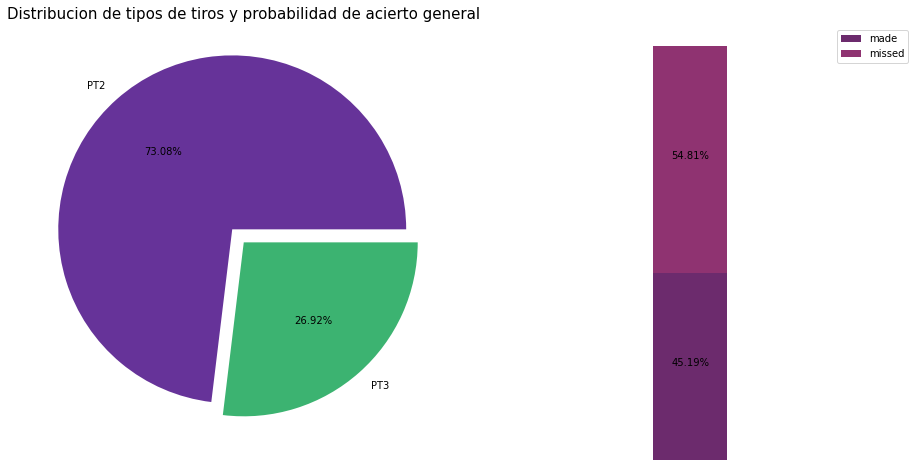

In [38]:
Porcentajes_tiros_acertados= data_raw["FGM"].sum()/data_raw["FGM"].shape[0]
Porcentajes_tiros_dobles= data_raw["FGM"][data_raw["PTS_TYPE"]==2.0].sum()/data_raw["FGM"].shape[0]

TotalesX = data_raw["PTS_TYPE"].value_counts()
datosX = np.array(TotalesX)
datosY = np.array([Porcentajes_tiros_acertados, 1-Porcentajes_tiros_acertados])

# make figure and assign axis objects
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)


# pie chart parameters
ratios = datosX
labels = ['PT2', 'PT3']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.2f%%', startangle=angle,
        labels=labels, explode=explode, colors=['rebeccapurple','mediumseagreen'])
ax1.set_title('Distribucion de tipos de tiros y probabilidad de acierto general', size=15)

# bar chart parameters
xpos = 0
bottom = 0
ratios = datosY
width = .2
colors= ['#6c2b6d','#8f3371']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, '%1.2f%%' % (ax2.patches[j].get_height() * 100),
             ha='center')


ax2.legend(('made','missed'))
ax2.axis('off')
ax2.set_xlim(- 3.0 * width, 3.0 * width)

plt.show()

In [39]:
Mask0 = data_raw['SHOT_RESULT'] == 'made'
Performance_acertado = data_raw.loc[Mask0]
PerformancexJugador = Performance_acertado.groupby('player_name').SHOT_DIST
PerformancexJugador = pd.DataFrame(PerformancexJugador.aggregate([np.min, np.median, np.mean, np.max]).round(2))
PerformancexJugador.sort_values(by='mean', ascending=False, inplace=True)
PerformancexJugador.reset_index(inplace=True)
PerformancexJugador.head(10)

,player_name,amin,median,mean,amax
0,mike miller,4.90,24.80,23.13,28.70
1,channing frye,1.10,24.30,22.08,29.80
2,kyle korver,1.30,23.65,21.91,29.10
3,luke babbitt,2.50,23.50,20.58,26.90
4,steve blake,0.40,22.80,20.12,28.50
5,hedo turkoglu,2.30,23.30,19.94,26.30
6,jordan farmar,0.80,23.35,19.82,32.90
7,pablo prigioni,0.90,24.10,19.61,31.20
8,damjan rudez,0.90,22.65,19.42,27.20
9,jason terry,2.80,22.30,19.14,28.30


In [40]:
Mask00 = (data_raw['PTS_TYPE'] == 3) & (data_raw['SHOT_RESULT'] == 'made')
Performance_acertado = data_raw.loc[Mask00]
PerformancexJugador_3pts = Performance_acertado.groupby('player_name').PTS_TYPE
PerformancexJugador_3pts = pd.DataFrame(PerformancexJugador_3pts.aggregate([np.sum]).round(2))
PerformancexJugador_3pts.reset_index(inplace=True)
PerformancexJugador_3pts = PerformancexJugador_3pts.merge(PerformancexJugador,how='left', on='player_name')
#index = PerformancexJugador_3pts.index
PerformancexJugador_3pts.sort_values(by='sum', ascending=False)

,player_name,sum,amin,median,mean,amax
209,stephen curry,564,0.10,18.55,15.50,31.80
131,klay thompson,531,0.20,18.10,15.76,28.90
134,kyle korver,528,1.30,23.65,21.91,29.10
233,wesley matthews,516,0.10,22.65,17.02,27.50
93,james harden,465,0.20,11.50,13.22,27.90
...,...,...,...,...,...,...
31,brook lopez,3,0.70,7.70,9.29,26.60
15,anthony davis,3,0.10,5.80,9.03,28.90
214,tim duncan,3,0.30,5.30,7.15,22.30
70,dwight howard,3,0.40,3.00,3.73,24.70


In [41]:
table = data_raw.pivot_table(data_raw, index=["PTS_TYPE","SHOT_RESULT"],columns={"LOCATION", 'W'},  aggfunc="count", sort = True)
data_raw.pivot_table(["player_id"], "PTS_TYPE", ['LOCATION', 'SHOT_RESULT'],  aggfunc="count", sort = True)

player_id                     
LOCATION            0             1       
SHOT_RESULT      made missed   made missed
PTS_TYPE                                  
2               22166  23587  22305  23014
3                5787  10875   6062  10823

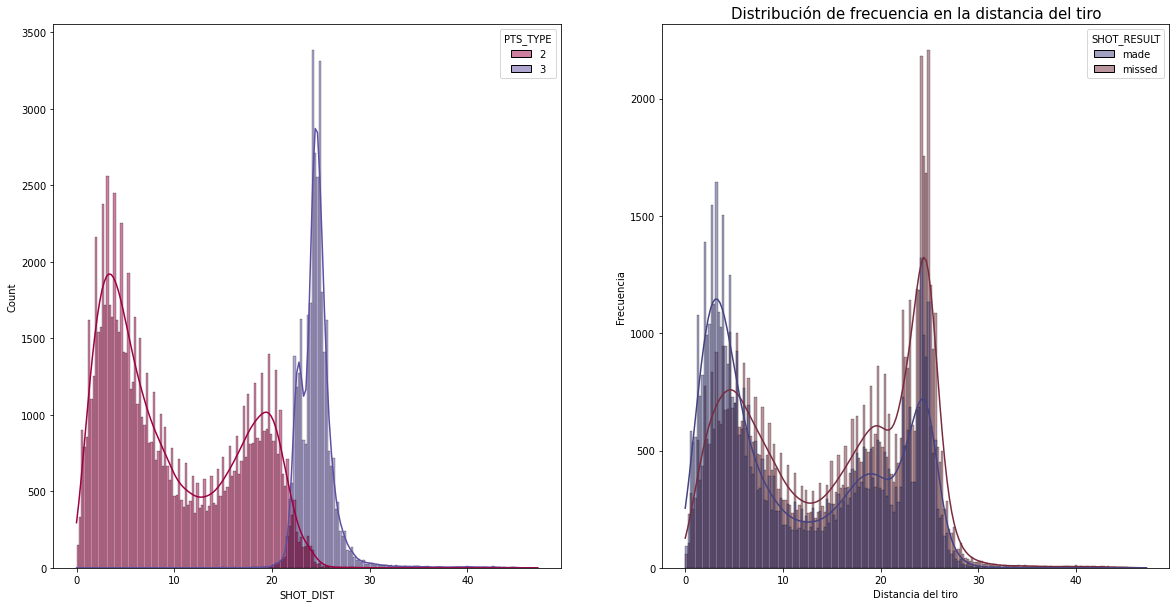

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))


# sns.histplot(data=data_raw, x=data_raw['SHOT_CLOCK'], color='rebeccapurple', bins=200, kde=True)
sns.histplot(data=data_raw, x=data_raw['SHOT_DIST'], hue='PTS_TYPE', palette = "Spectral", bins=200, kde=True, ax=axs[0])
sns.histplot(data=data_raw, x=data_raw['SHOT_DIST'], hue='SHOT_RESULT', palette= "icefire" , bins=200, kde=True, ax=axs[1])
plt.xlabel('Distancia del tiro',size=10);
plt.ylabel('Frecuencia', size=10)
plt.title('Distribución de frecuencia en la distancia del tiro', size=15)

plt.show()

Analizando el grafico y evaluando con los filtros podemos entender que los tiros de 3 tienen alta probabilidad en ser fallados por los jugadores. 

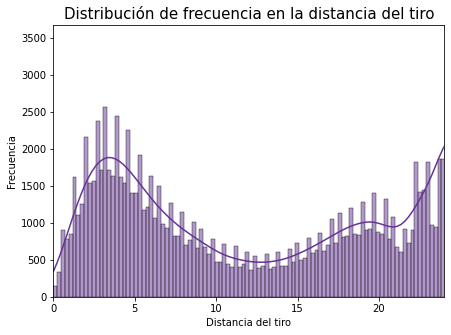

In [43]:
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_xlim(0, 24)

# sns.histplot(data=data_raw, x=data_raw['SHOT_CLOCK'], color='rebeccapurple', bins=200, kde=True)
sns.histplot(data=data_raw, x=data_raw['SHOT_DIST'], color='rebeccapurple', bins=200, kde=True)
plt.xlabel('Distancia del tiro',size=10);
plt.ylabel('Frecuencia', size=10)
plt.title('Distribución de frecuencia en la distancia del tiro', size=15)

plt.show()

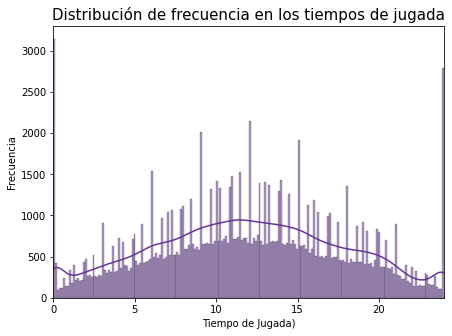

In [44]:
fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_xlim(0, 24)

sns.histplot(data=data_raw, x=data_raw['SHOT_CLOCK'], color='rebeccapurple', bins=200, kde=True)

plt.xlabel('Tiempo de Jugada)',size=10);
plt.ylabel('Frecuencia', size=10)
plt.title('Distribución de frecuencia en los tiempos de jugada', size=15)
plt.show()

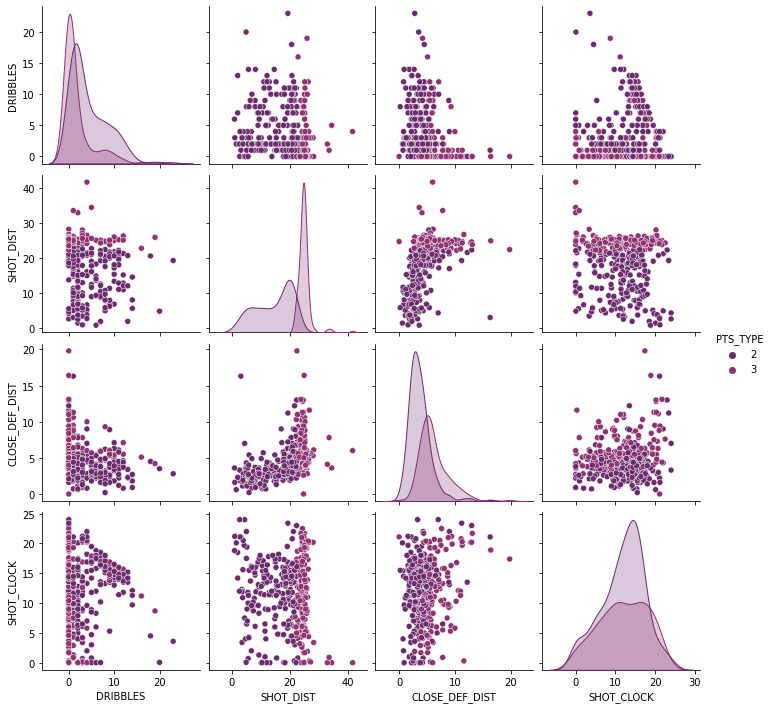

In [45]:
Mask01 = data_raw['player_id'] == 203148
sns.pairplot(data_raw.loc[Mask01], vars = ['DRIBBLES', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK'], hue= 'PTS_TYPE', palette=['#6c2b6d','#8f3371'])

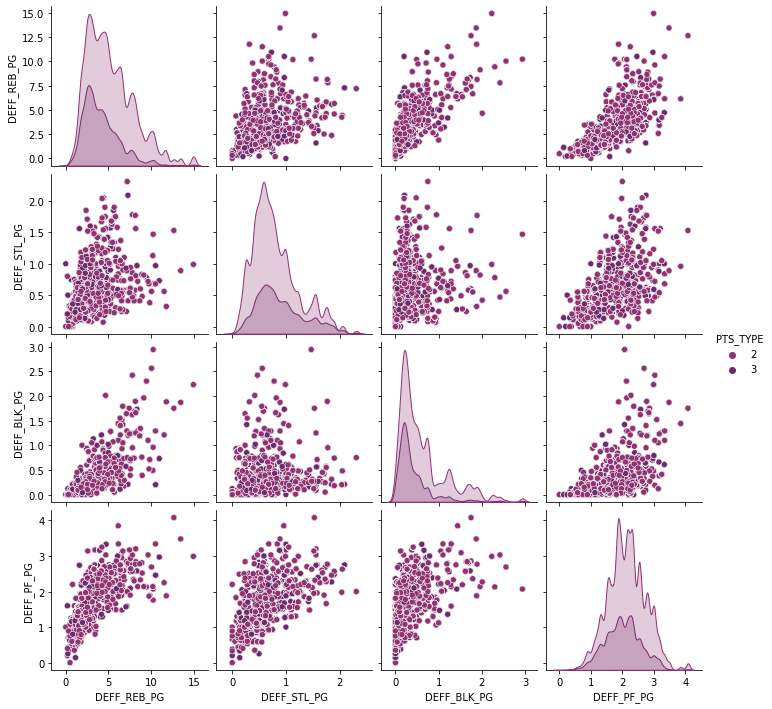

In [46]:
Player_performance = data_raw[['DEFF_AGE', 'DEFF_REB_PG', 'DEFF_STL_PG',
       'DEFF_BLK_PG', 'DEFF_PF_PG', 'OFF_AGE', 'OFF_FG_PCT', 'OFF_FG3_PCT',
       'OFF_FT_PCT', 'OFF_AST_PG', 'OFF_PTS_PG','PTS_TYPE','CLOSEST_DEFENDER_PLAYER_ID','player_id']]  
Mask02 = Player_performance['CLOSEST_DEFENDER_PLAYER_ID'] == 203148
Player_performance1 = Player_performance.loc[Mask01]
sns.pairplot(Player_performance, vars = ['DEFF_REB_PG',	'DEFF_STL_PG',	'DEFF_BLK_PG',	'DEFF_PF_PG'], hue = 'PTS_TYPE', palette=['#8f3371','#6c2b6d'])

#Seleccion de Columnas

In [47]:
data_raw_numerical_col = data_raw.select_dtypes(include = ['float64', 'int64','int32'])
data_raw_numerical_col.columns


Index(['GAME_ID', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD',
       'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST',
       'PTS_TYPE', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM',
       'PTS', 'player_id', 'DEFF_AGE', 'DEFF_REB_PG', 'DEFF_STL_PG',
       'DEFF_BLK_PG', 'DEFF_PF_PG', 'OFF_AGE', 'OFF_FG_PCT', 'OFF_FG3_PCT',
       'OFF_FT_PCT', 'OFF_AST_PG', 'OFF_PTS_PG'],
      dtype='object')

In [48]:
#Este fue usado para evaluar las mejores opciones en combinacion de columnas.
X = data_raw_numerical_col.drop(columns = ['GAME_ID','FINAL_MARGIN', 'FGM', 'player_id', 'CLOSEST_DEFENDER_PLAYER_ID', 'PTS'])

#En esta seleccion agregamos parametros que definen al Jugador que lanza y el que intenta defender.
X0 = data_raw[['SHOT_NUMBER', 'PERIOD', 'PTS_TYPE','SHOT_DIST', 'CLOSE_DEF_DIST', 'DEFF_BLK_PG','OFF_PTS_PG']]

#Esta es la primera condicion de columas a elegir porque digamos fue lo que dio kbest cuando pase todas las numericas
X1 = data_raw[['SHOT_CLOCK', 'SHOT_DIST', 'PTS_TYPE', 'OFF_FG_PCT', 'DEFF_BLK_PG']]

#Obtuvimos esta combinacion a partir de SelectkBest(), corrido en "pruebas con X"
X2 = data_raw[['W', 'SHOT_CLOCK', 'SHOT_DIST', 'PTS_TYPE', 'OFF_FG_PCT']]

y = data_raw.FGM

In [49]:
# columns_selection = [X0,X1,X2]
# for columns in columns_selection:
#   X_train, X_test, y_train, y_test = train_test_split(columns, y, stratify=y, random_state = 12)

# Modelizacion por clasificacion

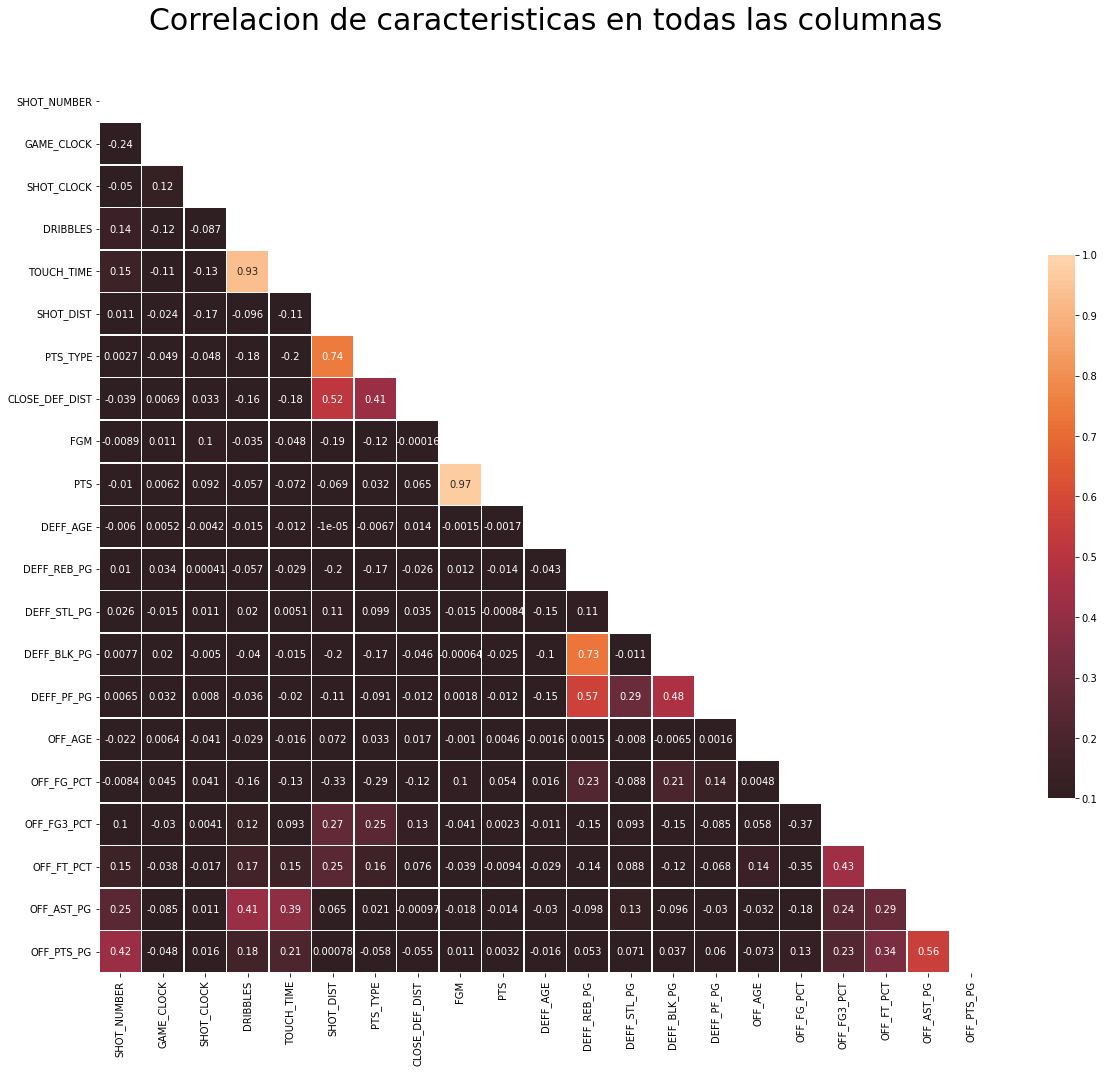

In [50]:
data_features = data_raw[['SHOT_NUMBER', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST', 'FGM', 'PTS', 'DEFF_AGE', 'DEFF_REB_PG', 'DEFF_STL_PG',
       'DEFF_BLK_PG', 'DEFF_PF_PG', 'OFF_AGE', 'OFF_FG_PCT', 'OFF_FG3_PCT',
       'OFF_FT_PCT', 'OFF_AST_PG', 'OFF_PTS_PG']]
corr = data_features.corr()

mask = np.triu(np.ones_like(corr, dtype=int))

f, ax = plt.subplots(figsize=(20, 20))

#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.color_palette("rocket_r", as_cmap=True)
#La Mascara asegura solo tomar los features numericos. 
plt.title("Correlacion de caracteristicas en todas las columnas", y=1.05,size=30)
sns.heatmap(corr, annot = True, mask=mask, vmin=0.1, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

#Pruebas con X

##X, y, Train, test slplit

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 12)

In [52]:
print(data_raw.FGM.value_counts()[1] / data_raw.shape[0])
print(y_train.value_counts()[1] / y_train.shape[0])
print(y_train.value_counts())

0.4519375055168153
0.4519387143713087
0    51224
1    42240
Name: FGM, dtype: int64


## Normalización

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sd = scaler.transform(X_train)
X_test_sd = scaler.transform(X_test)

## Seleccion de Columnas Luego de estandarizar. 

Con el resultado de estas dos celdas definimos las features de X2, que son la mejor combinacion segun  SelectkBest()

In [54]:
best= SelectKBest(k= 5)
X_new = best.fit_transform(X_train_sd, y_train)
X_new.shape
selected = best.get_support()
print(X.columns[selected])

Index(['W', 'SHOT_CLOCK', 'SHOT_DIST', 'PTS_TYPE', 'OFF_FG_PCT'], dtype='object')


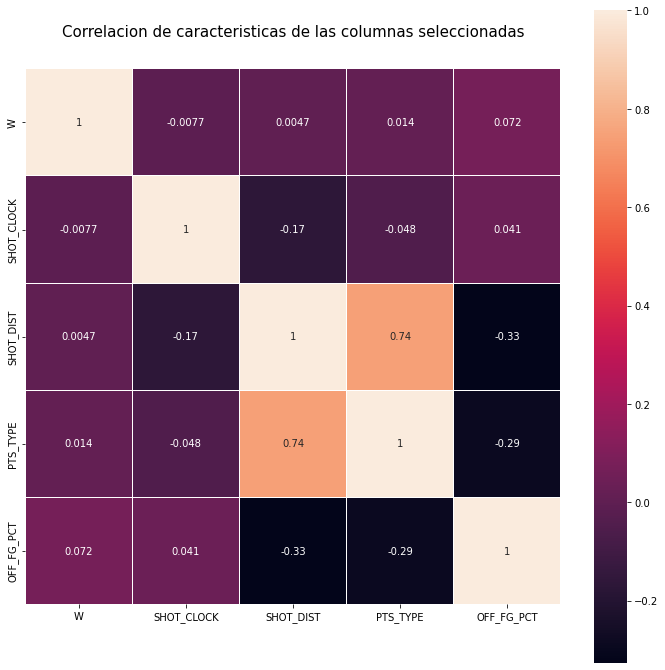

In [55]:
used_features = X.columns[selected]
cmap = sns.diverging_palette(230, 20, as_cmap=True)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Correlacion de caracteristicas de las columnas seleccionadas", y=1.05,size=15)
sns.heatmap(data_raw[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, linecolor="white", annot=True)

## Modelos

Se evaluaran distintos modelos de clasificacion para evaluar asi sus metricas y porcentaje de acierto respecto a la variable a predecir. Como tambien optimizar los hiperparametros de cada modelo.

###Regresion Logistica

En Primera Instancia se evalua el modelo de regresión Logistica sin estandarizacion y sin optimizar el Hiperparametro de C para así evaluar su performance inicial.

In [56]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_train, y_train);
print('parametros del modelo:',logistic_regression.get_params())
y_test_pred = logistic_regression.predict(X_test)
y_test_pred_proba = logistic_regression.predict_proba(X_test)
print('Matrix de probabilidad:',y_test_pred_proba)
accuracy1 = accuracy_score(y_test, y_test_pred)
print('Accuracy:',accuracy1)
print('Intercepto:',logistic_regression.intercept_)
print('Coeficientes:',logistic_regression.coef_)
y_test.value_counts()

parametros del modelo: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Matrix de probabilidad: [[0.43057325 0.56942675]
 [0.70353452 0.29646548]
 [0.66227646 0.33772354]
 ...
 [0.65824493 0.34175507]
 [0.54879579 0.45120421]
 [0.37754432 0.62245568]]
Accuracy: 0.6143155191783021
Intercepto: [-0.00036672]
Coeficientes: [[ 9.43059314e-03  6.79815325e-02  2.06750835e-03  4.25055659e-03
  -1.56062752e-05  1.43623634e-02  3.17100764e-02 -6.56797518e-02
  -6.39354161e-02  8.77854570e-03  1.11157928e-01 -3.34242392e-03
  -1.80475651e-02  1.17923144e-02 -3.42921714e-02 -9.88457094e-03
   5.95965786e-03  4.91219215e-03  1.19469699e-03  1.23180267e-03
  -2.05383772e-02  1.33109365e-02]]


0    17075
1    14080
Name: FGM, dtype: int64

In [57]:
confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusion[1,1])

print('\nTrue Negatives(TN) = ', confusion[0,0])

print('\nFalse Positives(FP) = ', confusion[0,1])

print('\nFalse Negatives(FN) = ', confusion[1,0])

Confusion matrix

 [[12699  4376]
 [ 7640  6440]]

True Positives(TP) =  6440

True Negatives(TN) =  12699

False Positives(FP) =  4376

False Negatives(FN) =  7640


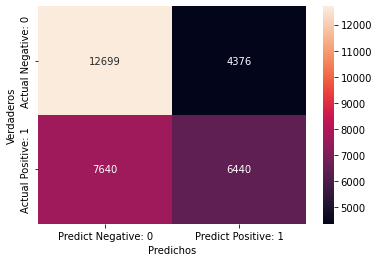

In [58]:
conf_mat_df = pd.DataFrame(data=confusion, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

El modelo predice mejor los resultados en tiros fallados con la etiqueta missed que los concretados. como se puede apreciar 

In [59]:
TP1 = confusion[1, 1]; TN1 = confusion[0, 0] ; FP1 = confusion[0, 1] ; FN1 = confusion[1, 0]
print('TP: ', TP1,' TN: ', TN1,' FP: ',FP1,' FN: ',FN1 )
Specificity1 = (TN1)/(TP1+FN1) 
Sensitivity1= (TP1)/(TP1+FN1)

TP:  6440  TN:  12699  FP:  4376  FN:  7640


In [60]:
print('Accuracy=', (TP1+TN1)/ (TP1+TN1+FP1+FN1))
print('Sensitivity=', Sensitivity1)
print('Specificity', Specificity1 )
print('Total de casos correctamente predichos (TP+TN) =',(TP1+TN1))
print('Total de casos (TP+TN+FP+FN) =',(TP1+TN1+FP1+FN1))

Accuracy= 0.6143155191783021
Sensitivity= 0.45738636363636365
Specificity 0.9019176136363637
Total de casos correctamente predichos (TP+TN) = 19139
Total de casos (TP+TN+FP+FN) = 31155


In [61]:
Recall1 = recall_score(y_test, y_test_pred,average= None)
Precision_Score1 = precision_score(y_test, y_test_pred, average= None)
F1_Score1 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall1)
print('Precision Score:', Precision_Score1)
print('F1 Score:',F1_Score1)

Recall Score: [0.74371889 0.45738636]
Precision Score: [0.62436698 0.5954142 ]
F1 Score: [0.6788368  0.51735219]


AUC= 0.6411820011979236


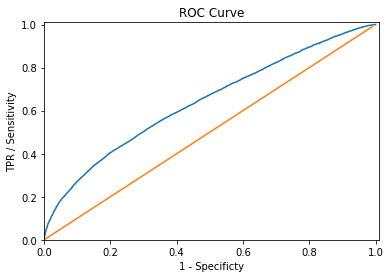

In [62]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

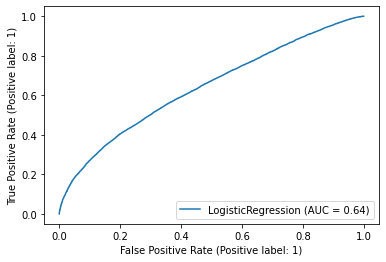

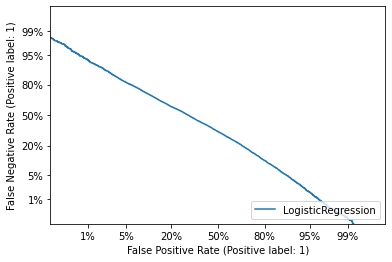

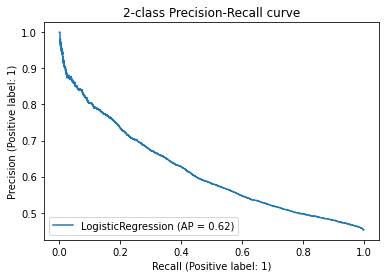

In [63]:
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
DetCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [64]:
# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_sd, y_train)

# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
# rfc_disp.figure_.suptitle("ROC curve comparison")

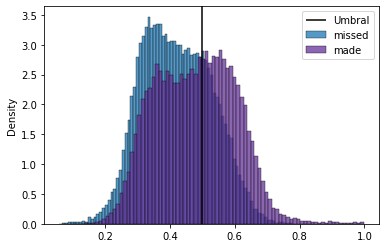

In [65]:
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

Bajo este criterio donde tenemos unos features balanceados.

In [66]:
y_pred_04 = binarize(y_test_pred_proba, threshold=0.4)[:,1]
y_pred_04 = (y_test_pred_proba[:,1] > 0.4).astype(int)
y_pred_04

array([1, 0, 0, ..., 0, 1, 1])

In [67]:
print('Matrix Original')
print(confusion_matrix(y_test,y_test_pred))
print('Nueva Matrix')
print(confusion_matrix(y_test,y_pred_04)) 
print('Acc umbral 0.5 =', accuracy_score(y_test, y_test_pred))
print('Acc umbral 0.4 =', accuracy_score(y_test, y_pred_04))
print('Recall umbral 0.5=', recall_score(y_test, y_test_pred))
print('Recall umbral 0.4=', recall_score(y_test, y_pred_04))

Matrix Original
[[12699  4376]
 [ 7640  6440]]
Nueva Matrix
[[7738 9337]
 [4085 9995]]
Acc umbral 0.5 = 0.6143155191783021
Acc umbral 0.4 = 0.5691863264323543
Recall umbral 0.5= 0.45738636363636365
Recall umbral 0.4= 0.7098721590909091


####Con Regularizacion

0.6147006900978976
[[ 0.0050694   0.09426611 -0.00670494 -0.00215922 -0.00975467  0.09201094
   0.1516324  -0.23722443 -0.59110805  0.0442832   0.29126029 -0.01044771
  -0.0180843   0.02489833 -0.08746701 -0.01900214  0.0256783   0.10281712
   0.016123    0.03900472 -0.01119627  0.04419301]]


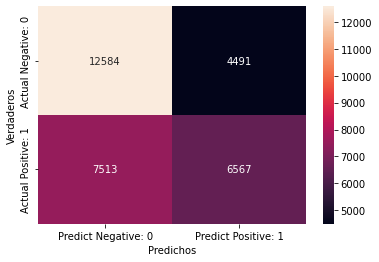

In [68]:
logistic_regression_Lasso = LogisticRegression(penalty='l1', solver= 'liblinear')
logistic_regression_Lasso.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Lasso.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Lasso.coef_)
confusion1 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion1, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

0.6146685925212646
[[ 0.00511116  0.09429259 -0.00684285 -0.00212312 -0.00982144  0.09200284
   0.15259793 -0.23809842 -0.59128713  0.04441038  0.29134798 -0.01049415
  -0.01809288  0.02495797 -0.08750083 -0.01905914  0.02574564  0.10286115
   0.01613626  0.03900846 -0.01140931  0.04443257]]


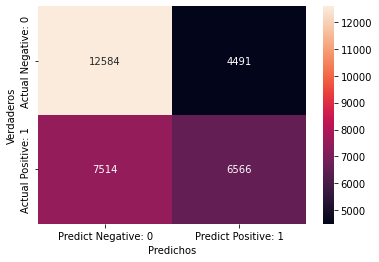

In [69]:
logistic_regression_Ridge = LogisticRegression(penalty='l2', solver= 'liblinear')
logistic_regression_Ridge.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Ridge.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Ridge.coef_)
confusion_matrix(y_test, y_test_pred)
confusion2 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion2, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

####Considerando Cross Validation 

0.6143155191783021
[[ 0.00602428  0.07025466 -0.00142615 -0.00569024 -0.00788189  0.1018864
  -0.01090246 -0.06520319 -0.26231913 -0.06742159  0.10991068 -0.0063255
  -0.01295733  0.00697584 -0.04124542 -0.01121689  0.00903484  0.08406645
   0.00381503  0.00615738  0.00051958  0.01743747]]


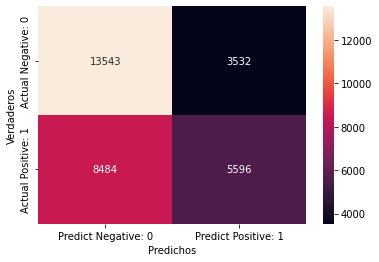

In [70]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_sd, y_train)
y_test_pred = clf.predict(X_test_sd)
y_test_pred
accuracy2 = accuracy_score(y_test, y_test_pred)
y_test_pred_proba = clf.predict_proba(X_test_sd)
print(accuracy2)
print(clf.coef_)
confusion_matrix(y_test, y_test_pred)
confusion3 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion3, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [71]:
confusioncv = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusioncv[1,1])

print('\nTrue Negatives(TN) = ', confusioncv[0,0])

print('\nFalse Positives(FP) = ', confusioncv[0,1])

print('\nFalse Negatives(FN) = ', confusioncv[1,0])

Confusion matrix

 [[12699  4376]
 [ 7640  6440]]

True Positives(TP) =  5596

True Negatives(TN) =  13543

False Positives(FP) =  3532

False Negatives(FN) =  8484


In [72]:
TP2 = confusioncv[1, 1]; TN2 = confusioncv[0, 0] ; FP2 = confusioncv[0, 1] ; FN2 = confusioncv[1, 0]
print('TP: ', TP2,' TN: ', TN2,' FP: ',FP2,' FN: ',FN2 )
Specificity2 = (TN2)/(TP2+FN2) 
Sensitivity2 = (TP2)/(TP2+FN2)

TP:  5596  TN:  13543  FP:  3532  FN:  8484


In [73]:
Recall2 = recall_score(y_test, y_test_pred,average= None)
Precision_Score2 = precision_score(y_test, y_test_pred, average= None)
F1_Score2 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall2)
print('Precision Score:', Precision_Score2)
print('F1 Score:',F1_Score2)

Recall Score: [0.79314788 0.39744318]
Precision Score: [0.61483634 0.61305872]
F1 Score: [0.69270114 0.4822475 ]


AUC= 0.6411820011979236


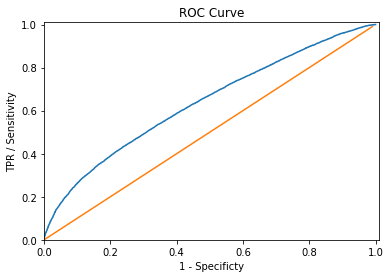

In [74]:
fpr_log_cv,tpr_log_cv,thr_log_cv = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

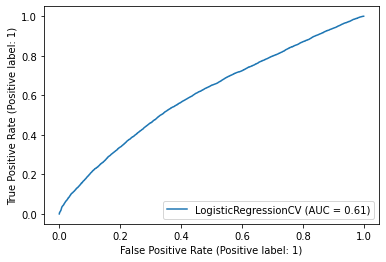

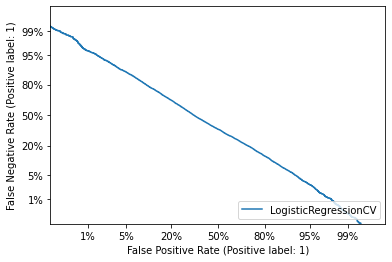

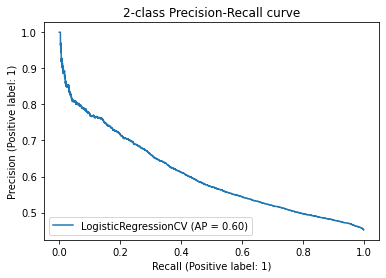

In [75]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
DetCurveDisplay.from_estimator(clf, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegressionCV")
_ = display.ax_.set_title("2-class Precision-Recall curve")

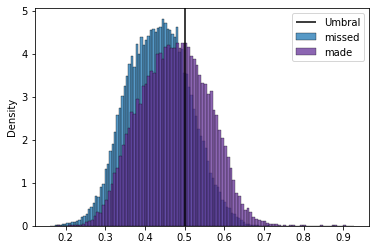

In [76]:
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==0])[:,1], stat = 'density')
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

El modelo mejora considerablemente con CV y estandarizando los features.

#####Grid Search

In [77]:
models = [LogisticRegression()]
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2'],
     'solver': ['liblinear','saga','sag']}]
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train_sd, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag']},
             scoring='accuracy')


In [78]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.6118933372553211
LogisticRegression(C=10, penalty='l1', solver='liblinear')
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [79]:
Scores_Hiperparamentros = pd.DataFrame(grids[0].cv_results_)
y_preds_log = grids[0].predict(X_test_sd)
print (classification_report(y_test, y_preds_log))
confusion_matrix(y_test, y_preds_log)
Scores_Hiperparamentros.head(2)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     17075
           1       0.59      0.47      0.52     14080

    accuracy                           0.61     31155
   macro avg       0.61      0.60      0.60     31155
weighted avg       0.61      0.61      0.61     31155



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.43,0.16,0.01,0.00,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.61,0.62,...,0.61,0.61,0.61,0.61,0.61,0.61,0.62,0.61,0.00,2
1,2.47,0.19,0.00,0.00,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.61,0.62,...,0.61,0.61,0.61,0.61,0.61,0.61,0.62,0.61,0.00,6


###Naive Bayes

In [80]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train_sd, y_train).predict(X_test_sd)

In [81]:
y_test_pred = gnb.predict(X_test_sd)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [82]:
print("accuracy_score_ ", (accuracy_score(y_test, y_test_pred)))
print(y_test.value_counts())

accuracy_score_  0.5848178462526079
0    17075
1    14080
Name: FGM, dtype: int64


In [83]:
confu = confusion_matrix(y_test, y_test_pred)
print(confu)

[[10892  6183]
 [ 6752  7328]]


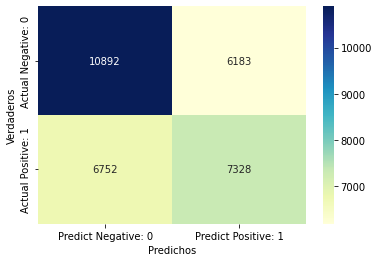

In [84]:
conf_mat_df = pd.DataFrame(data=confu, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [85]:
y_pred_bayes_proba = gnb.predict_proba(X_test_sd)

AUC= 0.6411820011979236


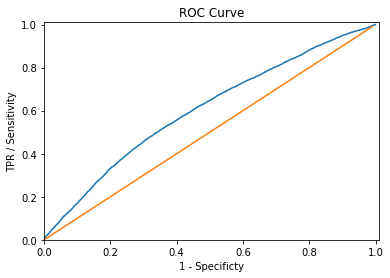

In [86]:
fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [87]:
confusionbestnb = confusion_matrix(y_test, y_pred_nb)
print(confusionbestnb)

[[10892  6183]
 [ 6752  7328]]


In [88]:
Recall3 = recall_score(y_test, y_pred_nb,average= None)
Precision_Score3 = precision_score(y_test, y_pred_nb, average= None)
F1_Score3 = f1_score(y_test, y_pred_nb, average= None)
print('Recall Score:',Recall3)
print('Precision Score:', Precision_Score3)
print('F1 Score:',F1_Score3)

Recall Score: [0.63789165 0.52045455]
Precision Score: [0.61732034 0.54237288]
F1 Score: [0.62743743 0.53118771]


In [89]:
accuracy3 = accuracy_score(y_test, y_pred_nb)

In [90]:
TP3 = confusionbestnb[1, 1]; TN3 = confusionbestnb[0, 0] ; FP3 = confusionbestnb[0, 1] ; FN3 = confusionbestnb[1, 0]
print('TP: ', TP3,' TN: ', TN3,' FP: ',FP3,' FN: ',FN3 )
Specificity3 = (TN3)/(TP3+FN3) 
Sensitivity3 = (TP3)/(TP3+FN3)

TP:  7328  TN:  10892  FP:  6183  FN:  6752


###KNN

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [92]:
confusionkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10600  6475]
 [ 7457  6623]]


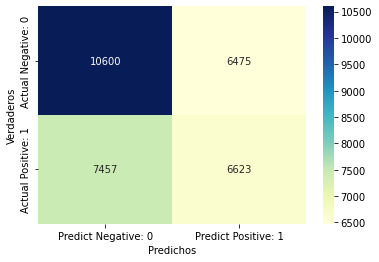

In [93]:
conf_mat_df = pd.DataFrame(data=confusionkn, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [94]:
TP4 = confusionkn[1, 1]; TN4 = confusionkn[0, 0] ; FP4 = confusionkn[0, 1] ; FN4 = confusionkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  6623  TN:  10600  FP:  6475  FN:  7457


In [95]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn))

Accuracy= 0.5528165623495426


In [96]:
print('Accuracy=', (TP4+TN4)/ (TP4+TN4+FP4+FN4))
print('Total de casos correctamente predichos (TP+TN) =',(TP4+TN4))
print('Total de casos (TP+TN+FP+FN) =',(TP4+TN4+FP4+FN4))

Accuracy= 0.5528165623495426
Total de casos correctamente predichos (TP+TN) = 17223
Total de casos (TP+TN+FP+FN) = 31155


In [97]:
print(recall_score(y_test, y_pred_knn,average=None))

[0.62079063 0.47038352]


In [98]:
fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_test_pred_proba_knn[:,1])

KNN Grid Search

In [99]:
# knn_gs = KNeighborsClassifier()
# knn_gs.get_params()

In [100]:
# k_range_knn_gs = list(range(2, 10))
# param_grid = dict(n_neighbors=k_range_knn_gs)
# print(param_grid)

In [101]:
# folds=StratifiedKFold(n_splits=2, random_state=9, shuffle=True)

In [102]:
# grid_knn = GridSearchCV(knn_gs, param_grid, cv=folds, scoring='accuracy')

In [103]:
# grid_knn.fit(X_train_sd, y_train)

In [104]:
# print(grid_knn.best_estimator_)
# print(grid_knn.best_score_)
# print(grid_knn.best_params_)

In [105]:
# y_pred_grid = grid_knn.predict(X_test_sd)

In [106]:
# confusion_grid_knn = confusion_matrix(y_test, y_pred_grid)
# print(confusion)

In [107]:
# print (classification_report(y_test, y_pred_grid))

KNN Random Search

In [108]:
# knn_rs = KNeighborsClassifier()

In [109]:
# k_range = list(range(1, 10))
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [110]:
# random_knn = RandomizedSearchCV(knn_rs, param_grid, n_iter=9, cv=folds, scoring='accuracy',random_state=9)
# random_knn.fit(X_train_sd, y_train)

In [111]:
# print (random_knn.best_estimator_)
# print(random_knn.best_score_)
# print(random_knn.best_params_)

In [112]:
# confusion_random_knn = confusion_matrix(y_test, random.predict(X_test_sd))
# print(confusion)

In [113]:
# print (classification_report(y_test, random_knn.predict(X_test_sd)))

Best KNN = 8, grid y random search devuelven el mismo valor, dejamos las celdas comentadas por el tiempo que tardan en ejecutarse.


In [114]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [115]:
confusionbestkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10600  6475]
 [ 7457  6623]]


In [116]:
Recall4 = recall_score(y_test, y_pred_knn,average= None)
Precision_Score4 = precision_score(y_test, y_pred_knn, average= None)
F1_Score4 = f1_score(y_test, y_pred_knn, average= None)
print('Recall Score:',Recall4)
print('Precision Score:', Precision_Score4)
print('F1 Score:',F1_Score4)

Recall Score: [0.75408492 0.35056818]
Precision Score: [0.58474114 0.54033935]
F1 Score: [0.65870316 0.4252423 ]


In [117]:
accuracy4 = accuracy_score(y_test, y_pred_knn)

In [118]:
TP4 = confusionbestkn[1, 1]; TN4 = confusionbestkn[0, 0] ; FP4 = confusionbestkn[0, 1] ; FN4 = confusionbestkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  4936  TN:  12876  FP:  4199  FN:  9144


## Conclusiones con X

Luego de evaluar distintos modelos, presentamos sus scores en una recopilacion de modelos considerando asi tambien las distintas opciones de seleccion de features. 

In [119]:
elementos={'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4],'TP':[TP1,TP2,TP3,TP4],'TN': [TN1,TN2,TN3,TN4], 'FP': [FP1,FP2,FP3,FP4],  'FN': [FN1,FN2,FN3,FN4], 'Sensitivity': [Sensitivity1,Sensitivity2,Sensitivity3,Sensitivity4], 'Specificity': [Specificity1,Specificity2,Specificity3,Specificity4], 'recall_score': [Recall1[1],Recall2[1],Recall3[1],Recall4[1]], 'precision_score': [Precision_Score1[1] ,Precision_Score2[1],Precision_Score3[1],Precision_Score4[1]], 'F1_Score': [F1_Score1[1],F1_Score2[1],F1_Score3[1],F1_Score4[1]]}
Comparacion_Modelos_x = pd.DataFrame(elementos,index=['Regresion Logistica ', 'Regresion Logistica CV ', 'Naive Bayes ', 'KNN ']) 

In [120]:
#elementos={"serie1":{'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4],'TP':[TP1,TP2,TP3,TP4],'TN': [TN1,TN2,TN3,TN4], 'FP': [FP1,FP2,FP3,FP4],  'FN': [FN1,FN2,FN3,FN4], 'Sensitivity': [Sensitivity1,Sensitivity2,Sensitivity3,Sensitivity4], 'Specificity': [Specificity1,Specificity2,Specificity3,Specificity4], 'recall_score': [Recall1[1],Recall2[1],Recall3[1],Recall4[1]], 'precision_score': [Precision_Score1[1] ,Precision_Score2[1],Precision_Score3[1],Precision_Score4[1]], 'F1_Score': [F1_Score1[1],F1_Score2[1],F1_Score3[1],F1_Score4[1]], 'Runtime': [1,2,3,4]}}
#Comparacion_Modelos = pd.DataFrame(elementos) #,index=['Regresion Logistica ', 'Regresion Logistica CV ', 'Naive Bayes ', 'KNN ']) 

In [121]:
#elementos={"seleccion de columnas":"opcion1", "tipo":['Regresion Logistica ', 'Regresion Logistica CV ', 'Naive Bayes ', 'KNN '],'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4],'TP':[TP1,TP2,TP3,TP4],'TN': [TN1,TN2,TN3,TN4], 'FP': [FP1,FP2,FP3,FP4],  'FN': [FN1,FN2,FN3,FN4], 'Sensitivity': [Sensitivity1,Sensitivity2,Sensitivity3,Sensitivity4], 'Specificity': [Specificity1,Specificity2,Specificity3,Specificity4], 'recall_score': [Recall1[1],Recall2[1],Recall3[1],Recall4[1]], 'precision_score': [Precision_Score1[1] ,Precision_Score2[1],Precision_Score3[1],Precision_Score4[1]], 'F1_Score': [F1_Score1[1],F1_Score2[1],F1_Score3[1],F1_Score4[1]], 'Runtime': [1,2,3,4]}
#Comparacion_Modelos = pd.DataFrame(elementos) 

In [122]:
#Comparacion_Modelos.set_index(["seleccion de columnas","tipo"]) 

In [123]:
Comparacion_Modelos_x.head()

,Accuracy,TP,TN,FP,FN,Sensitivity,Specificity,recall_score,precision_score,F1_Score
Regresion Logistica,0.61,6440,12699,4376,7640,0.46,0.90,0.46,0.60,0.52
Regresion Logistica CV,0.61,5596,13543,3532,8484,0.40,0.96,0.40,0.61,0.48
Naive Bayes,0.58,7328,10892,6183,6752,0.52,0.77,0.52,0.54,0.53
KNN,0.57,4936,12876,4199,9144,0.35,0.91,0.35,0.54,0.43


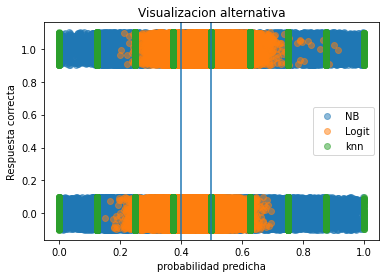

In [124]:
y_pred_bayes_proba # NaiveBayes probability
y_test_pred_proba # LogisticCV probability
y_test_pred_proba_knn # KNN probability
y_test
y_test_modificado = y_test + [random.random()/5-0.1 for _ in range(len(y_test))]
umbral1 = 0.5
umbral2 = 0.4

fig, ax = plt.subplots()
ax.scatter(y_pred_bayes_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba_knn[:,1],y_test_modificado, alpha=0.5)
ax.legend(['NB','Logit','knn'])
plt.xlabel('probabilidad predicha')
plt.ylabel('Respuesta correcta')
plt.title('Visualizacion alternativa')
plt.axvline(x=umbral1)
plt.axvline(x=umbral2)


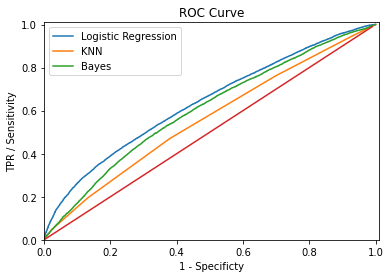

In [125]:
df_logistic = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
plt.plot(df_logistic['fpr'],df_logistic['tpr'], label='Logistic Regression')

df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_bayes = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

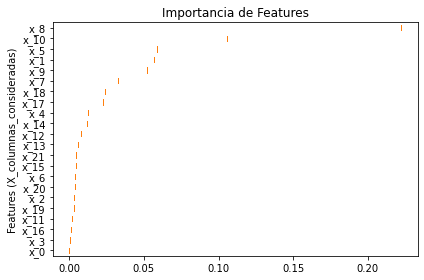

In [126]:
feature_names = np.array([f"x_{i}" for i in range(X_train_sd.shape[1])])

rf = RandomForestClassifier(random_state=0).fit(X_train_sd, y_train)
result = permutation_importance(rf, X_train_sd, y_train, n_repeats=1, random_state=0, n_jobs=2)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]
)
ax.set_title("Importancia de Features")
ax.set_ylabel("Features (X_columnas_consideradas)")
fig.tight_layout()
plt.show()

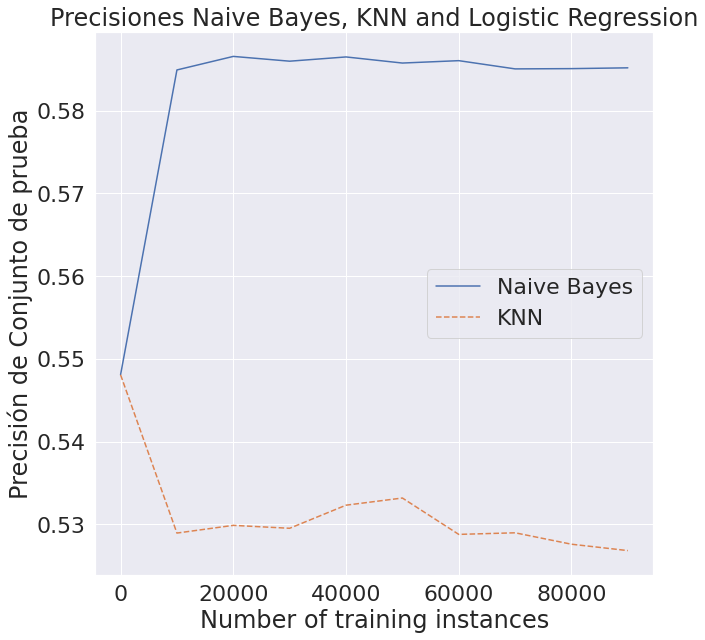

In [127]:
lr= LogisticRegression(penalty='none')
nb =GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1) 

lr_scores = []
nb_scores = []
knn_scores = []

train_sizes = range(1,len(X_train_sd),10000)  #

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train_sd, y_train, train_size=train_size, random_state=6)
    nb.fit(X_slice, y_slice) 
    nb_scores.append(nb.score(X_test_sd, y_test))
    #lr.fit(X_slice, y_slice)
    #lr_scores.append(lr.score(X_test_sd, y_test))
    knn.fit(X_slice, y_slice)
    knn_scores.append(knn.score(X_test_sd, y_test))


sns.set(font_scale=2)
fig = plt.subplots(figsize=(10,10))
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
#plt.plot(train_sizes, lr_scores, linestyle= '--', label='Logistic Regression CV')
plt.plot(train_sizes, knn_scores, label='KNN', linestyle="--")
plt.title("Precisiones Naive Bayes, KNN and Logistic Regression")
plt.xlabel("Number of training instances")
plt.ylabel("Precisión de Conjunto de prueba")
plt.legend()
sns.set(font_scale=1)

#Pruebas con X0

##X, y, Train, test slplit

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X0, y, stratify=y, random_state = 12)

In [129]:
print(data_raw.FGM.value_counts()[1] / data_raw.shape[0])
print(y_train.value_counts()[1] / y_train.shape[0])
print(y_train.value_counts())

0.4519375055168153
0.4519387143713087
0    51224
1    42240
Name: FGM, dtype: int64


## Normalización

In [130]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sd = scaler.transform(X_train)
X_test_sd = scaler.transform(X_test)

## Seleccion de Columnas Luego de estandarizar. 

In [131]:
# best= SelectKBest(k= 5)
# X_new = best.fit_transform(X_train_sd, y_train)
# #x_new.shape
# selected = best.get_support()
# print(X0.columns[selected])

In [132]:
# used_features = X #.columns[selected]
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# #colormap = plt.cm.viridis
# plt.figure(figsize=(12,12))
# plt.title("Correlacion de caracteristicas de las columnas seleccionadas", y=1.05,size=15)
# sns.heatmap(data_raw[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, linecolor="white", annot=True)

## Modelos

Se evaluaran distintos modelos de clasificacion para evaluar asi sus metricas y porcentaje de acierto respecto a la variable a predecir. Como tambien optimizar los hiperparametros de cada modelo.

###Regresion Logistica

En Primera Instancia se evalua el modelo de regresión Logistica sin estandarizacion y sin optimizar el Hiperparametro de C para así evaluar su performance inicial.

In [133]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_train, y_train);
print('parametros del modelo:',logistic_regression.get_params())
y_test_pred = logistic_regression.predict(X_test)
y_test_pred_proba = logistic_regression.predict_proba(X_test)
print('Matrix de probabilidad:',y_test_pred_proba)
accuracy1 = accuracy_score(y_test, y_test_pred)
print('Accuracy:',accuracy1)
print('Intercepto:',logistic_regression.intercept_)
print('Coeficientes:',logistic_regression.coef_)
y_test.value_counts()

parametros del modelo: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Matrix de probabilidad: [[0.41446105 0.58553895]
 [0.6262419  0.3737581 ]
 [0.56141513 0.43858487]
 ...
 [0.6807996  0.3192004 ]
 [0.57036125 0.42963875]
 [0.38663939 0.61336061]]
Accuracy: 0.6094045899534585
Intercepto: [-0.10236452]
Coeficientes: [[-0.00610464  0.00151098  0.17908639 -0.07338236  0.11954664 -0.19457994
   0.01183832]]


0    17075
1    14080
Name: FGM, dtype: int64

In [134]:
confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusion[1,1])

print('\nTrue Negatives(TN) = ', confusion[0,0])

print('\nFalse Positives(FP) = ', confusion[0,1])

print('\nFalse Negatives(FN) = ', confusion[1,0])

Confusion matrix

 [[12252  4823]
 [ 7346  6734]]

True Positives(TP) =  6734

True Negatives(TN) =  12252

False Positives(FP) =  4823

False Negatives(FN) =  7346


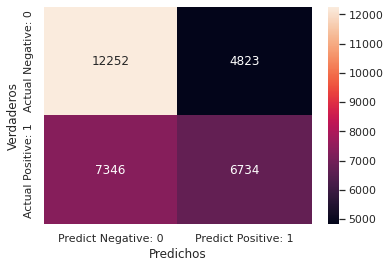

In [135]:
conf_mat_df = pd.DataFrame(data=confusion, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

El modelo predice mejor los resultados en tiros fallados con la etiqueta missed que los concretados. como se puede apreciar 

In [136]:
TP1 = confusion[1, 1]; TN1 = confusion[0, 0] ; FP1 = confusion[0, 1] ; FN1 = confusion[1, 0]
print('TP: ', TP1,' TN: ', TN1,' FP: ',FP1,' FN: ',FN1 )
Specificity1 = (TN1)/(TP1+FN1) 
Sensitivity1= (TP1)/(TP1+FN1)

TP:  6734  TN:  12252  FP:  4823  FN:  7346


In [137]:
print('Accuracy=', (TP1+TN1)/ (TP1+TN1+FP1+FN1))
print('Sensitivity=', Sensitivity1)
print('Specificity', Specificity1 )
print('Total de casos correctamente predichos (TP+TN) =',(TP1+TN1))
print('Total de casos (TP+TN+FP+FN) =',(TP1+TN1+FP1+FN1))

Accuracy= 0.6094045899534585
Sensitivity= 0.47826704545454546
Specificity 0.8701704545454545
Total de casos correctamente predichos (TP+TN) = 18986
Total de casos (TP+TN+FP+FN) = 31155


In [138]:
Recall1 = recall_score(y_test, y_test_pred,average= None)
Precision_Score1 = precision_score(y_test, y_test_pred, average= None)
F1_Score1 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall1)
print('Precision Score:', Precision_Score1)
print('F1 Score:',F1_Score1)

Recall Score: [0.71754026 0.47826705]
Precision Score: [0.62516583 0.58267717]
F1 Score: [0.6681755  0.52533448]


AUC= 0.6364702307666711


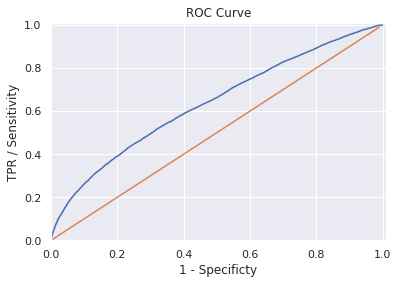

In [139]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

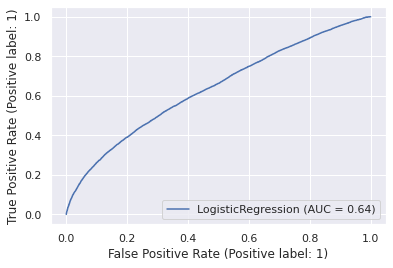

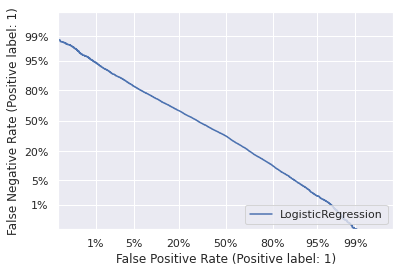

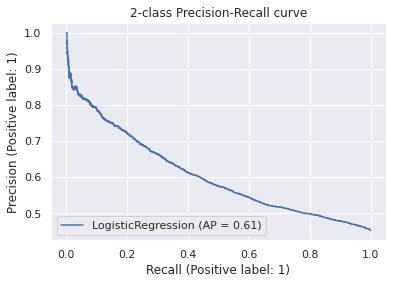

In [140]:
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
DetCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [141]:
# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_sd, y_train)

# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
# rfc_disp.figure_.suptitle("ROC curve comparison")

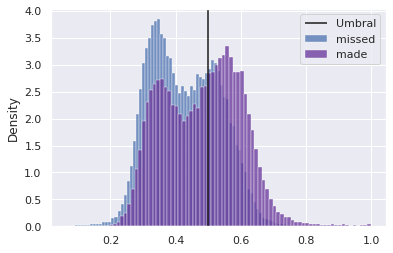

In [142]:
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

Bajo este criterio donde tenemos unos features balanceados.

In [143]:
y_pred_04 = binarize(y_test_pred_proba, threshold=0.4)[:,1]
y_pred_04 = (y_test_pred_proba[:,1] > 0.4).astype(int)
y_pred_04

array([1, 0, 1, ..., 0, 1, 1])

In [144]:
print('Matrix Original')
print(confusion_matrix(y_test,y_test_pred))
print('Nueva Matrix')
print(confusion_matrix(y_test,y_pred_04)) 
print('Acc umbral 0.5 =', accuracy_score(y_test, y_test_pred))
print('Acc umbral 0.4 =', accuracy_score(y_test, y_pred_04))
print('Recall umbral 0.5=', recall_score(y_test, y_test_pred))
print('Recall umbral 0.4=', recall_score(y_test, y_pred_04))

Matrix Original
[[12252  4823]
 [ 7346  6734]]
Nueva Matrix
[[7703 9372]
 [4088 9992]]
Acc umbral 0.5 = 0.6094045899534585
Acc umbral 0.4 = 0.5679666185203017
Recall umbral 0.5= 0.47826704545454546
Recall umbral 0.4= 0.709659090909091


####Con Regularizacion

0.6094687851067244
[[-0.02883059  0.00191052  0.07929206 -0.64913799  0.32760739 -0.10519562
   0.06473875]]


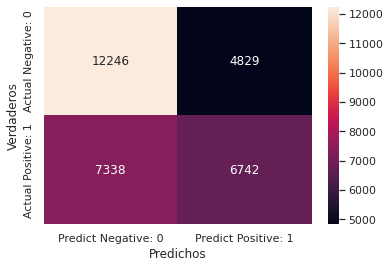

In [145]:
logistic_regression_Lasso = LogisticRegression(penalty='l1', solver= 'liblinear')
logistic_regression_Lasso.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Lasso.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Lasso.coef_)
confusion1 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion1, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

0.6093724923768256
[[-0.02910217  0.00214464  0.07942207 -0.64932057  0.32769506 -0.10524109
   0.06491818]]


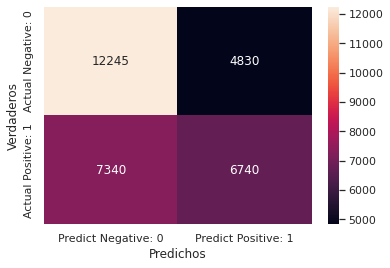

In [146]:
logistic_regression_Ridge = LogisticRegression(penalty='l2', solver= 'liblinear')
logistic_regression_Ridge.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Ridge.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Ridge.coef_)
confusion_matrix(y_test, y_test_pred)
confusion2 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion2, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

####Considerando Cross Validation 

0.6178462526079281
[[-0.01066787 -0.00956305 -0.06135821 -0.28930797  0.12517478 -0.04420235
   0.02297887]]


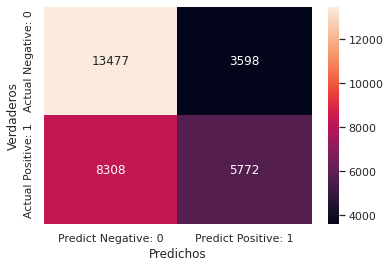

In [147]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_sd, y_train)
y_test_pred = clf.predict(X_test_sd)
y_test_pred
accuracy2 = accuracy_score(y_test, y_test_pred)
y_test_pred_proba = clf.predict_proba(X_test_sd)
print(accuracy2)
print(clf.coef_)
confusion_matrix(y_test, y_test_pred)
confusion3 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion3, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [148]:
confusioncv = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusioncv[1,1])

print('\nTrue Negatives(TN) = ', confusioncv[0,0])

print('\nFalse Positives(FP) = ', confusioncv[0,1])

print('\nFalse Negatives(FN) = ', confusioncv[1,0])

Confusion matrix

 [[12252  4823]
 [ 7346  6734]]

True Positives(TP) =  5772

True Negatives(TN) =  13477

False Positives(FP) =  3598

False Negatives(FN) =  8308


In [149]:
TP2 = confusioncv[1, 1]; TN2 = confusioncv[0, 0] ; FP2 = confusioncv[0, 1] ; FN2 = confusioncv[1, 0]
print('TP: ', TP2,' TN: ', TN2,' FP: ',FP2,' FN: ',FN2 )
Specificity2 = (TN2)/(TP2+FN2) 
Sensitivity2 = (TP2)/(TP2+FN2)

TP:  5772  TN:  13477  FP:  3598  FN:  8308


In [150]:
Recall2 = recall_score(y_test, y_test_pred,average= None)
Precision_Score2 = precision_score(y_test, y_test_pred, average= None)
F1_Score2 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall2)
print('Precision Score:', Precision_Score2)
print('F1 Score:',F1_Score2)

Recall Score: [0.78928258 0.40994318]
Precision Score: [0.61863668 0.61600854]
F1 Score: [0.69361812 0.49228145]


AUC= 0.6364702307666711


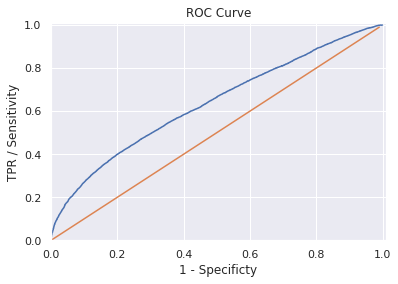

In [151]:
fpr_log_cv,tpr_log_cv,thr_log_cv = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

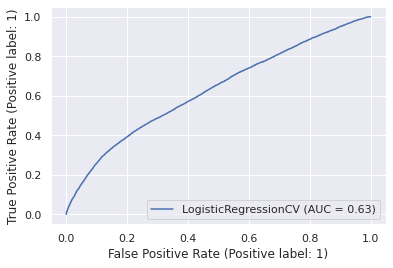

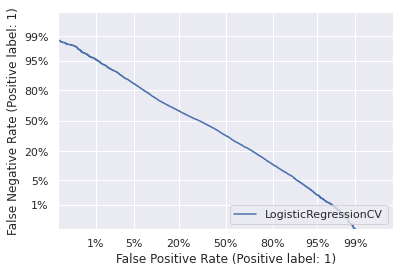

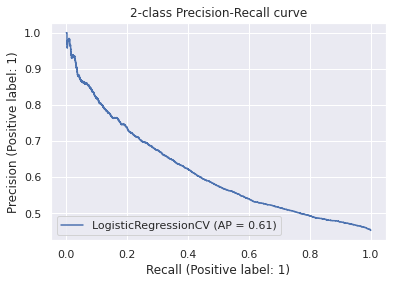

In [152]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
DetCurveDisplay.from_estimator(clf, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegressionCV")
_ = display.ax_.set_title("2-class Precision-Recall curve")

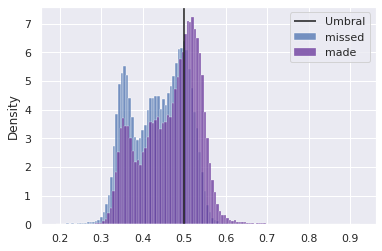

In [153]:
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==0])[:,1], stat = 'density')
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

El modelo mejora considerablemente con CV y estandarizando los features.

#####Grid Search

In [154]:
models = [LogisticRegression()]
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2'],
     'solver': ['liblinear','saga','sag']}]
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train_sd, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag']},
             scoring='accuracy')


In [155]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.6045643144454652
LogisticRegression(C=100, solver='sag')
{'C': 100, 'penalty': 'l2', 'solver': 'sag'}


In [156]:
Scores_Hiperparamentros = pd.DataFrame(grids[0].cv_results_)
y_preds_log = grids[0].predict(X_test_sd)
print (classification_report(y_test, y_preds_log))
confusion_matrix(y_test, y_preds_log)
Scores_Hiperparamentros.head(2)

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     17075
           1       0.58      0.48      0.53     14080

    accuracy                           0.61     31155
   macro avg       0.60      0.60      0.60     31155
weighted avg       0.61      0.61      0.60     31155



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.40,0.06,0.00,0.00,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.61,0.61,...,0.59,0.61,0.61,0.61,0.60,0.60,0.60,0.60,0.00,2
1,1.43,0.13,0.00,0.00,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.61,0.61,...,0.59,0.61,0.61,0.61,0.60,0.60,0.60,0.60,0.00,11


###Naive Bayes

In [157]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train_sd, y_train).predict(X_test_sd)

In [158]:
y_test_pred = gnb.predict(X_test_sd)
y_test_pred

array([1, 0, 0, ..., 0, 0, 1])

In [159]:
print("accuracy_score_ ", (accuracy_score(y_test, y_test_pred)))
print(y_test.value_counts())

accuracy_score_  0.5854597977852672
0    17075
1    14080
Name: FGM, dtype: int64


In [160]:
confu = confusion_matrix(y_test, y_test_pred)
print(confu)

[[10031  7044]
 [ 5871  8209]]


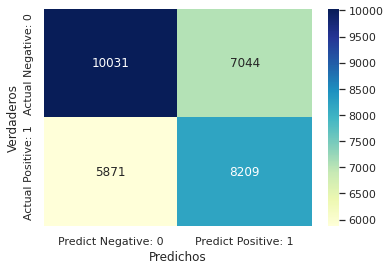

In [161]:
conf_mat_df = pd.DataFrame(data=confu, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [162]:
y_pred_bayes_proba = gnb.predict_proba(X_test_sd)

AUC= 0.6364702307666711


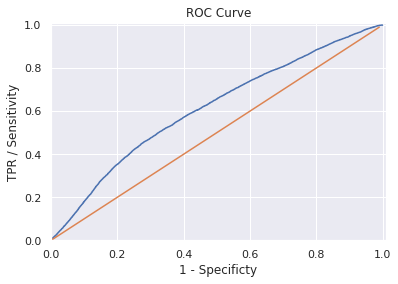

In [163]:
fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [164]:
confusionbestnb = confusion_matrix(y_test, y_pred_nb)
print(confusionbestnb)

[[10031  7044]
 [ 5871  8209]]


In [165]:
Recall3 = recall_score(y_test, y_pred_nb,average= None)
Precision_Score3 = precision_score(y_test, y_pred_nb, average= None)
F1_Score3 = f1_score(y_test, y_pred_nb, average= None)
print('Recall Score:',Recall3)
print('Precision Score:', Precision_Score3)
print('F1 Score:',F1_Score3)

Recall Score: [0.58746706 0.58302557]
Precision Score: [0.63080116 0.53818921]
F1 Score: [0.6083634  0.55971091]


In [166]:
accuracy3 = accuracy_score(y_test, y_pred_nb)

In [167]:
TP3 = confusionbestnb[1, 1]; TN3 = confusionbestnb[0, 0] ; FP3 = confusionbestnb[0, 1] ; FN3 = confusionbestnb[1, 0]
print('TP: ', TP3,' TN: ', TN3,' FP: ',FP3,' FN: ',FN3 )
Specificity3 = (TN3)/(TP3+FN3) 
Sensitivity3 = (TP3)/(TP3+FN3)

TP:  8209  TN:  10031  FP:  7044  FN:  5871


###KNN

In [168]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [169]:
confusionkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10955  6120]
 [ 7468  6612]]


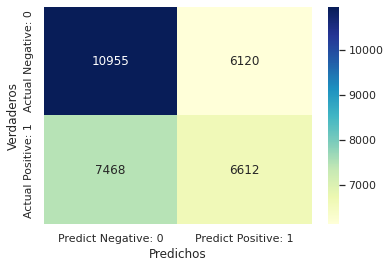

In [170]:
conf_mat_df = pd.DataFrame(data=confusionkn, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [171]:
TP4 = confusionkn[1, 1]; TN4 = confusionkn[0, 0] ; FP4 = confusionkn[0, 1] ; FN4 = confusionkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  6612  TN:  10955  FP:  6120  FN:  7468


In [172]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn))

Accuracy= 0.5638581287112823


In [173]:
print('Accuracy=', (TP4+TN4)/ (TP4+TN4+FP4+FN4))
print('Total de casos correctamente predichos (TP+TN) =',(TP4+TN4))
print('Total de casos (TP+TN+FP+FN) =',(TP4+TN4+FP4+FN4))

Accuracy= 0.5638581287112823
Total de casos correctamente predichos (TP+TN) = 17567
Total de casos (TP+TN+FP+FN) = 31155


In [174]:
print(recall_score(y_test, y_pred_knn,average=None))

[0.64158126 0.46960227]


In [175]:
fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_test_pred_proba_knn[:,1])

KNN Grid Search

In [176]:
# knn_gs = KNeighborsClassifier()
# knn_gs.get_params()

In [177]:
# k_range_knn_gs = list(range(2, 10))
# param_grid = dict(n_neighbors=k_range_knn_gs)
# print(param_grid)

In [178]:
# folds=StratifiedKFold(n_splits=2, random_state=9, shuffle=True)

In [179]:
# grid_knn = GridSearchCV(knn_gs, param_grid, cv=folds, scoring='accuracy')

In [180]:
# grid_knn.fit(X_train_sd, y_train)

In [181]:
# print(grid_knn.best_estimator_)
# print(grid_knn.best_score_)
# print(grid_knn.best_params_)

In [182]:
# y_pred_grid = grid_knn.predict(X_test_sd)

In [183]:
# confusion_grid_knn = confusion_matrix(y_test, y_pred_grid)
# print(confusion)

In [184]:
# print (classification_report(y_test, y_pred_grid))

KNN Random Search

In [185]:
# knn_rs = KNeighborsClassifier()

In [186]:
# k_range = list(range(1, 10))
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [187]:
# random_knn = RandomizedSearchCV(knn_rs, param_grid, n_iter=9, cv=folds, scoring='accuracy',random_state=9)
# random_knn.fit(X_train_sd, y_train)

In [188]:
# print (random_knn.best_estimator_)
# print(random_knn.best_score_)
# print(random_knn.best_params_)

In [189]:
# confusion_random_knn = confusion_matrix(y_test, random.predict(X_test_sd))
# print(confusion)

In [190]:
# print (classification_report(y_test, random_knn.predict(X_test_sd)))

Best KNN = 8, grid y random search devuelven el mismo valor, dejamos las celdas comentadas por el tiempo que tardan en ejecutarse.


In [191]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [192]:
confusionbestkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10955  6120]
 [ 7468  6612]]


In [193]:
Recall4 = recall_score(y_test, y_pred_knn,average= None)
Precision_Score4 = precision_score(y_test, y_pred_knn, average= None)
F1_Score4 = f1_score(y_test, y_pred_knn, average= None)
print('Recall Score:',Recall4)
print('Precision Score:', Precision_Score4)
print('F1 Score:',F1_Score4)

Recall Score: [0.76855051 0.35639205]
Precision Score: [0.59152581 0.55942029]
F1 Score: [0.66851758 0.4354013 ]


In [194]:
accuracy4 = accuracy_score(y_test, y_pred_knn)

In [195]:
TP4 = confusionbestkn[1, 1]; TN4 = confusionbestkn[0, 0] ; FP4 = confusionbestkn[0, 1] ; FN4 = confusionbestkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  5018  TN:  13123  FP:  3952  FN:  9062


## Conclusiones con X0

Luego de evaluar distintos modelos, presentamos sus scores en una recopilacion de modelos considerando asi tambien las distintas opciones de seleccion de features. 

In [196]:
elementos={'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4],'TP':[TP1,TP2,TP3,TP4],'TN': [TN1,TN2,TN3,TN4], 'FP': [FP1,FP2,FP3,FP4],  'FN': [FN1,FN2,FN3,FN4], 'Sensitivity': [Sensitivity1,Sensitivity2,Sensitivity3,Sensitivity4], 'Specificity': [Specificity1,Specificity2,Specificity3,Specificity4], 'recall_score': [Recall1[1],Recall2[1],Recall3[1],Recall4[1]], 'precision_score': [Precision_Score1[1] ,Precision_Score2[1],Precision_Score3[1],Precision_Score4[1]], 'F1_Score': [F1_Score1[1],F1_Score2[1],F1_Score3[1],F1_Score4[1]]}
Comparacion_Modelos_x0 = pd.DataFrame(elementos,index=['Regresion Logistica ', 'Regresion Logistica CV ', 'Naive Bayes ', 'KNN ']) 

In [197]:
Comparacion_Modelos_x0.head()

,Accuracy,TP,TN,FP,FN,Sensitivity,Specificity,recall_score,precision_score,F1_Score
Regresion Logistica,0.61,6734,12252,4823,7346,0.48,0.87,0.48,0.58,0.53
Regresion Logistica CV,0.62,5772,13477,3598,8308,0.41,0.96,0.41,0.62,0.49
Naive Bayes,0.59,8209,10031,7044,5871,0.58,0.71,0.58,0.54,0.56
KNN,0.58,5018,13123,3952,9062,0.36,0.93,0.36,0.56,0.44


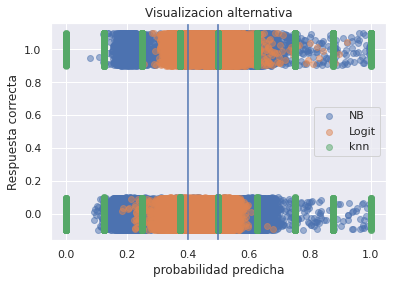

In [198]:
y_pred_bayes_proba # NaiveBayes probability
y_test_pred_proba # LogisticCV probability
y_test_pred_proba_knn # KNN probability
y_test
y_test_modificado = y_test + [random.random()/5-0.1 for _ in range(len(y_test))]
umbral1 = 0.5
umbral2 = 0.4

fig, ax = plt.subplots()
ax.scatter(y_pred_bayes_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba_knn[:,1],y_test_modificado, alpha=0.5)
ax.legend(['NB','Logit','knn'])
plt.xlabel('probabilidad predicha')
plt.ylabel('Respuesta correcta')
plt.title('Visualizacion alternativa')
plt.axvline(x=umbral1)
plt.axvline(x=umbral2)


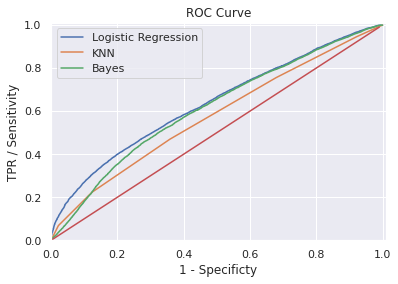

In [199]:
df_logistic = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
plt.plot(df_logistic['fpr'],df_logistic['tpr'], label='Logistic Regression')

df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_bayes = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

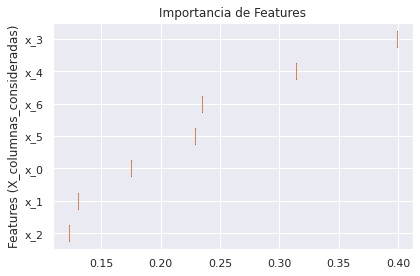

In [200]:
feature_names = np.array([f"x_{i}" for i in range(X_train_sd.shape[1])])

rf = RandomForestClassifier(random_state=0).fit(X_train_sd, y_train)
result = permutation_importance(rf, X_train_sd, y_train, n_repeats=1, random_state=0, n_jobs=2)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]
)
ax.set_title("Importancia de Features")
ax.set_ylabel("Features (X_columnas_consideradas)")
fig.tight_layout()
plt.show()

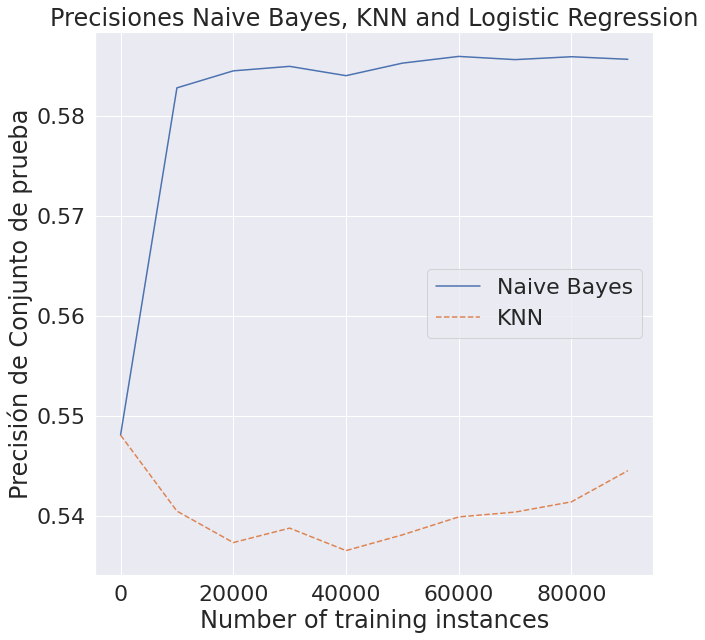

In [201]:
lr= LogisticRegression(penalty='none')
nb =GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1) 

lr_scores = []
nb_scores = []
knn_scores = []

train_sizes = range(1,len(X_train_sd),10000)  #

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train_sd, y_train, train_size=train_size, random_state=6)
    nb.fit(X_slice, y_slice) 
    nb_scores.append(nb.score(X_test_sd, y_test))
    #lr.fit(X_slice, y_slice)
    #lr_scores.append(lr.score(X_test_sd, y_test))
    knn.fit(X_slice, y_slice)
    knn_scores.append(knn.score(X_test_sd, y_test))


sns.set(font_scale=2)
fig = plt.subplots(figsize=(10,10))
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
#plt.plot(train_sizes, lr_scores, linestyle= '--', label='Logistic Regression CV')
plt.plot(train_sizes, knn_scores, label='KNN', linestyle="--")
plt.title("Precisiones Naive Bayes, KNN and Logistic Regression")
plt.xlabel("Number of training instances")
plt.ylabel("Precisión de Conjunto de prueba")
plt.legend()

In [202]:
sns.set(font_scale=1)

#Pruebas con X1

##X, y, Train, test slplit

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state = 12)

In [204]:
print(data_raw.FGM.value_counts()[1] / data_raw.shape[0])
print(y_train.value_counts()[1] / y_train.shape[0])
print(y_train.value_counts())

0.4519375055168153
0.4519387143713087
0    51224
1    42240
Name: FGM, dtype: int64


## Normalización

In [205]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sd = scaler.transform(X_train)
X_test_sd = scaler.transform(X_test)

## Seleccion de Columnas Luego de estandarizar. 

In [206]:
# best= SelectKBest(k= 5)
# X_new = best.fit_transform(X_train_sd, y_train)
# #x_new.shape
# selected = best.get_support()
# print(X1.columns[selected])

In [207]:
# used_features = X.columns[selected]
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# #colormap = plt.cm.viridis
# plt.figure(figsize=(12,12))
# plt.title("Correlacion de caracteristicas de las columnas seleccionadas", y=1.05,size=15)
# sns.heatmap(data_raw[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, linecolor="white", annot=True)

## Modelos

Se evaluaran distintos modelos de clasificacion para evaluar asi sus metricas y porcentaje de acierto respecto a la variable a predecir. Como tambien optimizar los hiperparametros de cada modelo.

###Regresion Logistica

En Primera Instancia se evalua el modelo de regresión Logistica sin estandarizacion y sin optimizar el Hiperparametro de C para así evaluar su performance inicial.

In [208]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_train, y_train);
print('parametros del modelo:',logistic_regression.get_params())
y_test_pred = logistic_regression.predict(X_test)
y_test_pred_proba = logistic_regression.predict_proba(X_test)
print('Matrix de probabilidad:',y_test_pred_proba)
accuracy1 = accuracy_score(y_test, y_test_pred)
print('Accuracy:',accuracy1)
print('Intercepto:',logistic_regression.intercept_)
print('Coeficientes:',logistic_regression.coef_)
y_test.value_counts()

parametros del modelo: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Matrix de probabilidad: [[0.54757154 0.45242846]
 [0.63810826 0.36189174]
 [0.60862518 0.39137482]
 ...
 [0.66842797 0.33157203]
 [0.58425608 0.41574392]
 [0.45844733 0.54155267]]
Accuracy: 0.6059701492537314
Intercepto: [-1.27256584]
Coeficientes: [[ 0.02398452 -0.04620324  0.18458506  2.43662311 -0.17357564]]


0    17075
1    14080
Name: FGM, dtype: int64

In [209]:
confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusion[1,1])

print('\nTrue Negatives(TN) = ', confusion[0,0])

print('\nFalse Positives(FP) = ', confusion[0,1])

print('\nFalse Negatives(FN) = ', confusion[1,0])

Confusion matrix

 [[12560  4515]
 [ 7761  6319]]

True Positives(TP) =  6319

True Negatives(TN) =  12560

False Positives(FP) =  4515

False Negatives(FN) =  7761


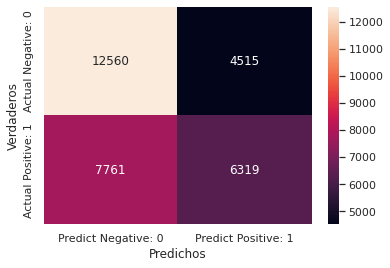

In [210]:
conf_mat_df = pd.DataFrame(data=confusion, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

El modelo predice mejor los resultados en tiros fallados con la etiqueta missed que los concretados. como se puede apreciar 

In [211]:
TP1 = confusion[1, 1]; TN1 = confusion[0, 0] ; FP1 = confusion[0, 1] ; FN1 = confusion[1, 0]
print('TP: ', TP1,' TN: ', TN1,' FP: ',FP1,' FN: ',FN1 )
Specificity1 = (TN1)/(TP1+FN1) 
Sensitivity1= (TP1)/(TP1+FN1)

TP:  6319  TN:  12560  FP:  4515  FN:  7761


In [212]:
print('Accuracy=', (TP1+TN1)/ (TP1+TN1+FP1+FN1))
print('Sensitivity=', Sensitivity1)
print('Specificity', Specificity1 )
print('Total de casos correctamente predichos (TP+TN) =',(TP1+TN1))
print('Total de casos (TP+TN+FP+FN) =',(TP1+TN1+FP1+FN1))

Accuracy= 0.6059701492537314
Sensitivity= 0.44879261363636364
Specificity 0.8920454545454546
Total de casos correctamente predichos (TP+TN) = 18879
Total de casos (TP+TN+FP+FN) = 31155


In [213]:
Recall1 = recall_score(y_test, y_test_pred,average= None)
Precision_Score1 = precision_score(y_test, y_test_pred, average= None)
F1_Score1 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall1)
print('Precision Score:', Precision_Score1)
print('F1 Score:',F1_Score1)

Recall Score: [0.73557833 0.44879261]
Precision Score: [0.61807982 0.58325641]
F1 Score: [0.6717296  0.50726499]


AUC= 0.6267521317216824


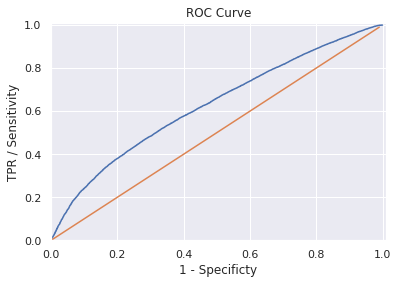

In [214]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

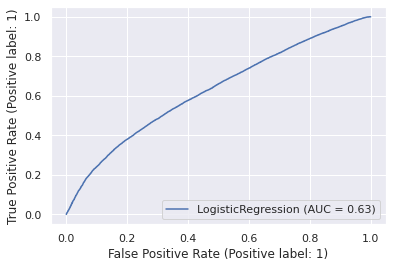

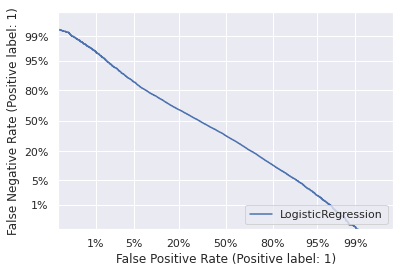

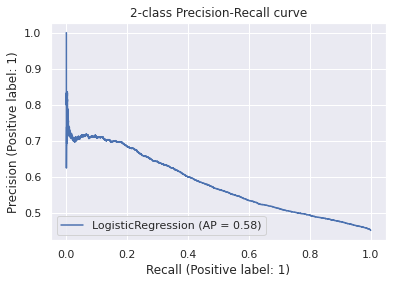

In [215]:
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
DetCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [216]:
# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_sd, y_train)

# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
# rfc_disp.figure_.suptitle("ROC curve comparison")

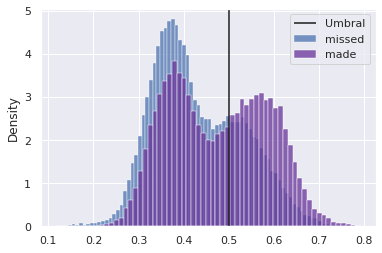

In [217]:
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

Bajo este criterio donde tenemos unos features balanceados.

In [218]:
y_pred_04 = binarize(y_test_pred_proba, threshold=0.4)[:,1]
y_pred_04 = (y_test_pred_proba[:,1] > 0.4).astype(int)
y_pred_04

array([1, 0, 0, ..., 0, 1, 1])

In [219]:
print('Matrix Original')
print(confusion_matrix(y_test,y_test_pred))
print('Nueva Matrix')
print(confusion_matrix(y_test,y_pred_04)) 
print('Acc umbral 0.5 =', accuracy_score(y_test, y_test_pred))
print('Acc umbral 0.4 =', accuracy_score(y_test, y_pred_04))
print('Recall umbral 0.5=', recall_score(y_test, y_test_pred))
print('Recall umbral 0.4=', recall_score(y_test, y_pred_04))

Matrix Original
[[12560  4515]
 [ 7761  6319]]
Nueva Matrix
[[7876 9199]
 [4334 9746]]
Acc umbral 0.5 = 0.6059701492537314
Acc umbral 0.4 = 0.5656234954260954
Recall umbral 0.5= 0.44879261363636364
Recall umbral 0.4= 0.6921875


####Con Regularizacion

0.6059701492537314
[[ 0.14252551 -0.40867914  0.08169581  0.12300054 -0.09383257]]


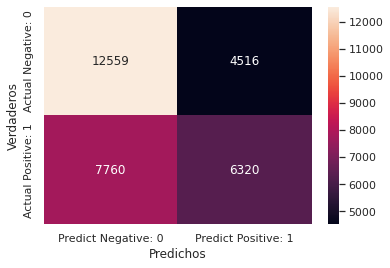

In [220]:
logistic_regression_Lasso = LogisticRegression(penalty='l1', solver= 'liblinear')
logistic_regression_Lasso.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Lasso.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Lasso.coef_)
confusion1 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion1, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

0.6059701492537314
[[ 0.14254175 -0.40885092  0.08186988  0.12305647 -0.09389128]]


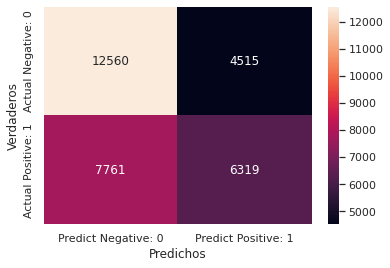

In [221]:
logistic_regression_Ridge = LogisticRegression(penalty='l2', solver= 'liblinear')
logistic_regression_Ridge.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Ridge.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Ridge.coef_)
confusion_matrix(y_test, y_test_pred)
confusion2 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion2, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

####Considerando Cross Validation 

0.6063874177499599
[[ 0.11484787 -0.22177313 -0.0393549   0.09538272 -0.04842673]]


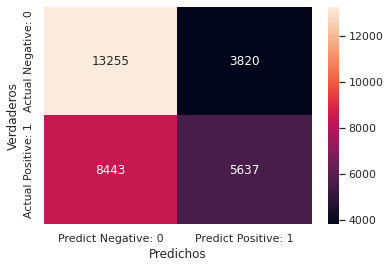

In [222]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_sd, y_train)
y_test_pred = clf.predict(X_test_sd)
y_test_pred
accuracy2 = accuracy_score(y_test, y_test_pred)
y_test_pred_proba = clf.predict_proba(X_test_sd)
print(accuracy2)
print(clf.coef_)
confusion_matrix(y_test, y_test_pred)
confusion3 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion3, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [223]:
confusioncv = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusioncv[1,1])

print('\nTrue Negatives(TN) = ', confusioncv[0,0])

print('\nFalse Positives(FP) = ', confusioncv[0,1])

print('\nFalse Negatives(FN) = ', confusioncv[1,0])

Confusion matrix

 [[12560  4515]
 [ 7761  6319]]

True Positives(TP) =  5637

True Negatives(TN) =  13255

False Positives(FP) =  3820

False Negatives(FN) =  8443


In [224]:
TP2 = confusioncv[1, 1]; TN2 = confusioncv[0, 0] ; FP2 = confusioncv[0, 1] ; FN2 = confusioncv[1, 0]
print('TP: ', TP2,' TN: ', TN2,' FP: ',FP2,' FN: ',FN2 )
Specificity2 = (TN2)/(TP2+FN2) 
Sensitivity2 = (TP2)/(TP2+FN2)

TP:  5637  TN:  13255  FP:  3820  FN:  8443


In [225]:
Recall2 = recall_score(y_test, y_test_pred,average= None)
Precision_Score2 = precision_score(y_test, y_test_pred, average= None)
F1_Score2 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall2)
print('Precision Score:', Precision_Score2)
print('F1 Score:',F1_Score2)

Recall Score: [0.77628111 0.40035511]
Precision Score: [0.6108858  0.59606641]
F1 Score: [0.68372321 0.47899053]


AUC= 0.6267521317216824


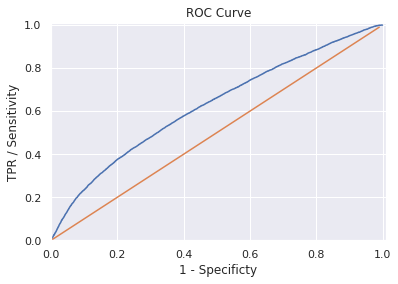

In [226]:
fpr_log_cv,tpr_log_cv,thr_log_cv = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

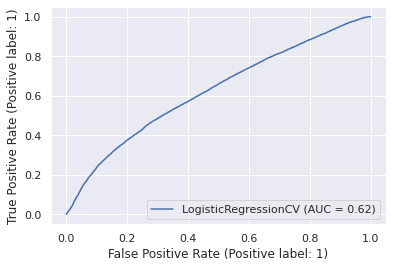

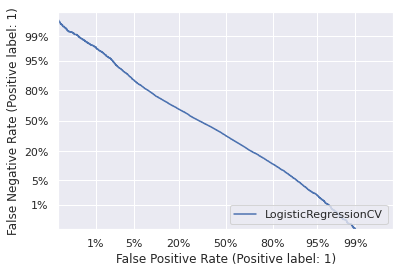

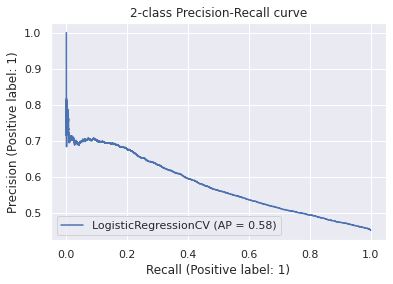

In [227]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
DetCurveDisplay.from_estimator(clf, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegressionCV")
_ = display.ax_.set_title("2-class Precision-Recall curve")

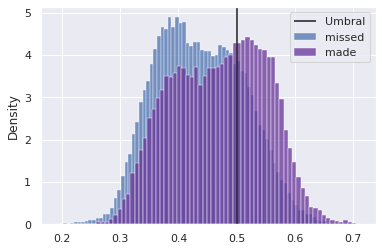

In [228]:
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==0])[:,1], stat = 'density')
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

El modelo mejora considerablemente con CV y estandarizando los features.

#####Grid Search

In [229]:
models = [LogisticRegression()]
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2'],
     'solver': ['liblinear','saga','sag']}]
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train_sd, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag']},
             scoring='accuracy')


In [230]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.6037083699083194
LogisticRegression(C=1, solver='sag')
{'C': 1, 'penalty': 'l2', 'solver': 'sag'}


In [231]:
Scores_Hiperparamentros = pd.DataFrame(grids[0].cv_results_)
y_preds_log = grids[0].predict(X_test_sd)
print (classification_report(y_test, y_preds_log))
confusion_matrix(y_test, y_preds_log)
Scores_Hiperparamentros.head(2)

              precision    recall  f1-score   support

           0       0.62      0.74      0.67     17075
           1       0.58      0.45      0.51     14080

    accuracy                           0.61     31155
   macro avg       0.60      0.59      0.59     31155
weighted avg       0.60      0.61      0.60     31155



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.28,0.06,0.00,0.00,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.61,0.60,...,0.60,0.60,0.61,0.60,0.60,0.60,0.61,0.60,0.00,18
1,1.52,0.18,0.00,0.00,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.61,0.60,...,0.60,0.60,0.61,0.60,0.60,0.60,0.61,0.60,0.00,3


###Naive Bayes

In [232]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train_sd, y_train).predict(X_test_sd)

In [233]:
y_test_pred = gnb.predict(X_test_sd)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [234]:
print("accuracy_score_ ", (accuracy_score(y_test, y_test_pred)))
print(y_test.value_counts())

accuracy_score_  0.5934199967902424
0    17075
1    14080
Name: FGM, dtype: int64


In [235]:
confu = confusion_matrix(y_test, y_test_pred)
print(confu)

[[10555  6520]
 [ 6147  7933]]


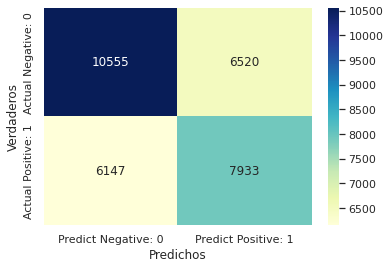

In [236]:
conf_mat_df = pd.DataFrame(data=confu, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [237]:
y_pred_bayes_proba = gnb.predict_proba(X_test_sd)

AUC= 0.6267521317216824


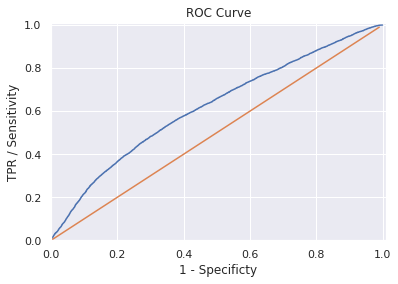

In [238]:
fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [239]:
confusionbestnb = confusion_matrix(y_test, y_pred_nb)
print(confusionbestnb)

[[10555  6520]
 [ 6147  7933]]


In [240]:
Recall3 = recall_score(y_test, y_pred_nb,average= None)
Precision_Score3 = precision_score(y_test, y_pred_nb, average= None)
F1_Score3 = f1_score(y_test, y_pred_nb, average= None)
print('Recall Score:',Recall3)
print('Precision Score:', Precision_Score3)
print('F1 Score:',F1_Score3)

Recall Score: [0.6181552 0.5634233]
Precision Score: [0.63196024 0.54888258]
F1 Score: [0.6249815 0.5560579]


In [241]:
accuracy3 = accuracy_score(y_test, y_pred_nb)

In [242]:
TP3 = confusionbestnb[1, 1]; TN3 = confusionbestnb[0, 0] ; FP3 = confusionbestnb[0, 1] ; FN3 = confusionbestnb[1, 0]
print('TP: ', TP3,' TN: ', TN3,' FP: ',FP3,' FN: ',FN3 )
Specificity3 = (TN3)/(TP3+FN3) 
Sensitivity3 = (TP3)/(TP3+FN3)

TP:  7933  TN:  10555  FP:  6520  FN:  6147


###KNN

In [243]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [244]:
confusionkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10844  6231]
 [ 7404  6676]]


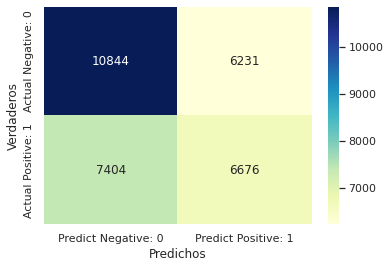

In [245]:
conf_mat_df = pd.DataFrame(data=confusionkn, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [246]:
TP4 = confusionkn[1, 1]; TN4 = confusionkn[0, 0] ; FP4 = confusionkn[0, 1] ; FN4 = confusionkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  6676  TN:  10844  FP:  6231  FN:  7404


In [247]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn))

Accuracy= 0.562349542609533


In [248]:
print('Accuracy=', (TP4+TN4)/ (TP4+TN4+FP4+FN4))
print('Total de casos correctamente predichos (TP+TN) =',(TP4+TN4))
print('Total de casos (TP+TN+FP+FN) =',(TP4+TN4+FP4+FN4))

Accuracy= 0.562349542609533
Total de casos correctamente predichos (TP+TN) = 17520
Total de casos (TP+TN+FP+FN) = 31155


In [249]:
print(recall_score(y_test, y_pred_knn,average=None))

[0.63508053 0.47414773]


In [250]:
fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_test_pred_proba_knn[:,1])

KNN Grid Search

In [251]:
# knn_gs = KNeighborsClassifier()
# knn_gs.get_params()

In [252]:
# k_range_knn_gs = list(range(2, 10))
# param_grid = dict(n_neighbors=k_range_knn_gs)
# print(param_grid)

In [253]:
# folds=StratifiedKFold(n_splits=2, random_state=9, shuffle=True)

In [254]:
# grid_knn = GridSearchCV(knn_gs, param_grid, cv=folds, scoring='accuracy')

In [255]:
# grid_knn.fit(X_train_sd, y_train)

In [256]:
# print(grid_knn.best_estimator_)
# print(grid_knn.best_score_)
# print(grid_knn.best_params_)

In [257]:
# y_pred_grid = grid_knn.predict(X_test_sd)

In [258]:
# confusion_grid_knn = confusion_matrix(y_test, y_pred_grid)
# print(confusion)

In [259]:
# print (classification_report(y_test, y_pred_grid))

KNN Random Search

In [260]:
# knn_rs = KNeighborsClassifier()

In [261]:
# k_range = list(range(1, 10))
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [262]:
# random_knn = RandomizedSearchCV(knn_rs, param_grid, n_iter=9, cv=folds, scoring='accuracy',random_state=9)
# random_knn.fit(X_train_sd, y_train)

In [263]:
# print (random_knn.best_estimator_)
# print(random_knn.best_score_)
# print(random_knn.best_params_)

In [264]:
# confusion_random_knn = confusion_matrix(y_test, random.predict(X_test_sd))
# print(confusion)

In [265]:
# print (classification_report(y_test, random_knn.predict(X_test_sd)))

Best KNN = 8, grid y random search devuelven el mismo valor, dejamos las celdas comentadas por el tiempo que tardan en ejecutarse.


In [266]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [267]:
confusionbestkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10844  6231]
 [ 7404  6676]]


In [268]:
Recall4 = recall_score(y_test, y_pred_knn,average= None)
Precision_Score4 = precision_score(y_test, y_pred_knn, average= None)
F1_Score4 = f1_score(y_test, y_pred_knn, average= None)
print('Recall Score:',Recall4)
print('Precision Score:', Precision_Score4)
print('F1 Score:',F1_Score4)

Recall Score: [0.75941435 0.36200284]
Precision Score: [0.59075171 0.5537208 ]
F1 Score: [0.66454837 0.43779257]


In [269]:
accuracy4 = accuracy_score(y_test, y_pred_knn)

In [270]:
TP4 = confusionbestkn[1, 1]; TN4 = confusionbestkn[0, 0] ; FP4 = confusionbestkn[0, 1] ; FN4 = confusionbestkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  5097  TN:  12967  FP:  4108  FN:  8983


## Conclusiones con X1

Luego de evaluar distintos modelos, presentamos sus scores en una recopilacion de modelos considerando asi tambien las distintas opciones de seleccion de features. 

In [271]:
elementos={'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4],'TP':[TP1,TP2,TP3,TP4],'TN': [TN1,TN2,TN3,TN4], 'FP': [FP1,FP2,FP3,FP4],  'FN': [FN1,FN2,FN3,FN4], 'Sensitivity': [Sensitivity1,Sensitivity2,Sensitivity3,Sensitivity4], 'Specificity': [Specificity1,Specificity2,Specificity3,Specificity4], 'recall_score': [Recall1[1],Recall2[1],Recall3[1],Recall4[1]], 'precision_score': [Precision_Score1[1] ,Precision_Score2[1],Precision_Score3[1],Precision_Score4[1]], 'F1_Score': [F1_Score1[1],F1_Score2[1],F1_Score3[1],F1_Score4[1]]}
Comparacion_Modelos_x1 = pd.DataFrame(elementos,index=['Regresion Logistica ', 'Regresion Logistica CV ', 'Naive Bayes ', 'KNN ']) 

In [272]:
Comparacion_Modelos_x1.head()

,Accuracy,TP,TN,FP,FN,Sensitivity,Specificity,recall_score,precision_score,F1_Score
Regresion Logistica,0.61,6319,12560,4515,7761,0.45,0.89,0.45,0.58,0.51
Regresion Logistica CV,0.61,5637,13255,3820,8443,0.40,0.94,0.40,0.60,0.48
Naive Bayes,0.59,7933,10555,6520,6147,0.56,0.75,0.56,0.55,0.56
KNN,0.58,5097,12967,4108,8983,0.36,0.92,0.36,0.55,0.44


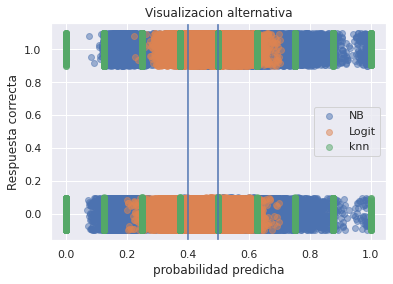

In [273]:
y_pred_bayes_proba # NaiveBayes probability
y_test_pred_proba # LogisticCV probability
y_test_pred_proba_knn # KNN probability
y_test
y_test_modificado = y_test + [random.random()/5-0.1 for _ in range(len(y_test))]
umbral1 = 0.5
umbral2 = 0.4

fig, ax = plt.subplots()
ax.scatter(y_pred_bayes_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba_knn[:,1],y_test_modificado, alpha=0.5)
ax.legend(['NB','Logit','knn'])
plt.xlabel('probabilidad predicha')
plt.ylabel('Respuesta correcta')
plt.title('Visualizacion alternativa')
plt.axvline(x=umbral1)
plt.axvline(x=umbral2)


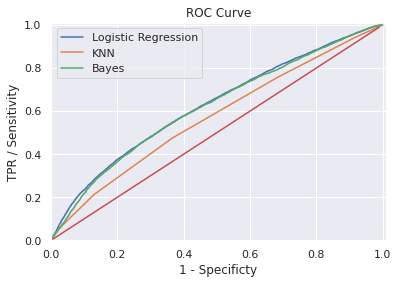

In [274]:

df_logistic = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
plt.plot(df_logistic['fpr'],df_logistic['tpr'], label='Logistic Regression')

df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_bayes = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')


plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

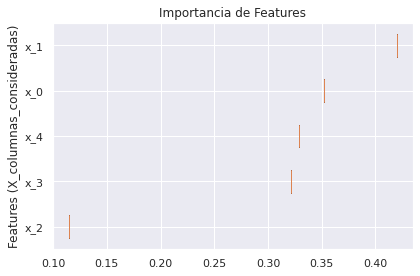

In [275]:



feature_names = np.array([f"x_{i}" for i in range(X_train_sd.shape[1])])

rf = RandomForestClassifier(random_state=0).fit(X_train_sd, y_train)
result = permutation_importance(rf, X_train_sd, y_train, n_repeats=1, random_state=0, n_jobs=2)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]
)
ax.set_title("Importancia de Features")
ax.set_ylabel("Features (X_columnas_consideradas)")
fig.tight_layout()
plt.show()

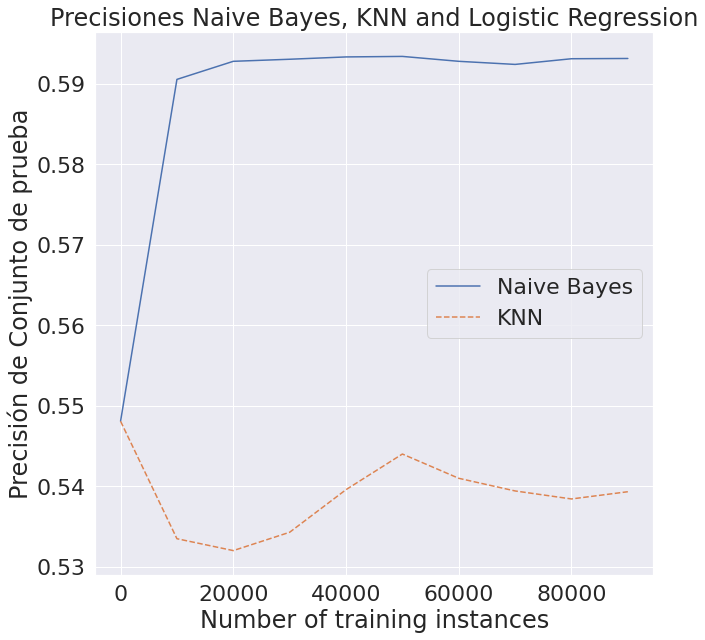

In [276]:
lr= LogisticRegression(penalty='none')
nb =GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1) 

lr_scores = []
nb_scores = []
knn_scores = []

train_sizes = range(1,len(X_train_sd),10000)  #

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train_sd, y_train, train_size=train_size, random_state=6)
    nb.fit(X_slice, y_slice) 
    nb_scores.append(nb.score(X_test_sd, y_test))
    #lr.fit(X_slice, y_slice)
    #lr_scores.append(lr.score(X_test_sd, y_test))
    knn.fit(X_slice, y_slice)
    knn_scores.append(knn.score(X_test_sd, y_test))


sns.set(font_scale=2)
fig = plt.subplots(figsize=(10,10))
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
#plt.plot(train_sizes, lr_scores, linestyle= '--', label='Logistic Regression CV')
plt.plot(train_sizes, knn_scores, label='KNN', linestyle="--")
plt.title("Precisiones Naive Bayes, KNN and Logistic Regression")
plt.xlabel("Number of training instances")
plt.ylabel("Precisión de Conjunto de prueba")
plt.legend()

In [277]:
sns.set(font_scale=1)

#Pruebas con X2

##X, y, Train, test slplit

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, stratify=y, random_state = 12)

In [279]:
print(data_raw.FGM.value_counts()[1] / data_raw.shape[0])
print(y_train.value_counts()[1] / y_train.shape[0])
print(y_train.value_counts())

0.4519375055168153
0.4519387143713087
0    51224
1    42240
Name: FGM, dtype: int64


## Normalización

In [280]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sd = scaler.transform(X_train)
X_test_sd = scaler.transform(X_test)

## Seleccion de Columnas Luego de estandarizar. 

In [281]:
# best= SelectKBest(k= 5)
# X_new = best.fit_transform(X_train_sd, y_train)
# #x_new.shape
# selected = best.get_support()
# print(X.columns[selected])

In [282]:
# used_features = X.columns[selected]
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# #colormap = plt.cm.viridis
# plt.figure(figsize=(12,12))
# plt.title("Correlacion de caracteristicas de las columnas seleccionadas", y=1.05,size=15)
# sns.heatmap(data_raw[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, linecolor="white", annot=True)

## Modelos

Se evaluaran distintos modelos de clasificacion para evaluar asi sus metricas y porcentaje de acierto respecto a la variable a predecir. Como tambien optimizar los hiperparametros de cada modelo.

###Regresion Logistica

En Primera Instancia se evalua el modelo de regresión Logistica sin estandarizacion y sin optimizar el Hiperparametro de C para así evaluar su performance inicial.

In [283]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_train, y_train);
print('parametros del modelo:',logistic_regression.get_params())
y_test_pred = logistic_regression.predict(X_test)
y_test_pred_proba = logistic_regression.predict_proba(X_test)
print('Matrix de probabilidad:',y_test_pred_proba)
accuracy1 = accuracy_score(y_test, y_test_pred)
print('Accuracy:',accuracy1)
print('Intercepto:',logistic_regression.intercept_)
print('Coeficientes:',logistic_regression.coef_)
y_test.value_counts()

parametros del modelo: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Matrix de probabilidad: [[0.54057119 0.45942881]
 [0.61549354 0.38450646]
 [0.59690839 0.40309161]
 ...
 [0.65552585 0.34447415]
 [0.61301596 0.38698404]
 [0.45472257 0.54527743]]
Accuracy: 0.6045899534585139
Intercepto: [-1.29221084]
Coeficientes: [[ 0.21628464  0.02471253 -0.04478871  0.18098107  1.97677491]]


0    17075
1    14080
Name: FGM, dtype: int64

In [284]:
confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusion[1,1])

print('\nTrue Negatives(TN) = ', confusion[0,0])

print('\nFalse Positives(FP) = ', confusion[0,1])

print('\nFalse Negatives(FN) = ', confusion[1,0])

Confusion matrix

 [[12524  4551]
 [ 7768  6312]]

True Positives(TP) =  6312

True Negatives(TN) =  12524

False Positives(FP) =  4551

False Negatives(FN) =  7768


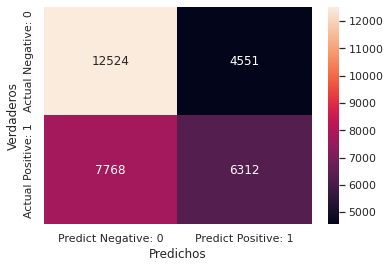

In [285]:
conf_mat_df = pd.DataFrame(data=confusion, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

El modelo predice mejor los resultados en tiros fallados con la etiqueta missed que los concretados. como se puede apreciar 

In [286]:
TP1 = confusion[1, 1]; TN1 = confusion[0, 0] ; FP1 = confusion[0, 1] ; FN1 = confusion[1, 0]
print('TP: ', TP1,' TN: ', TN1,' FP: ',FP1,' FN: ',FN1 )
Specificity1 = (TN1)/(TP1+FN1) 
Sensitivity1= (TP1)/(TP1+FN1)

TP:  6312  TN:  12524  FP:  4551  FN:  7768


In [287]:
print('Accuracy=', (TP1+TN1)/ (TP1+TN1+FP1+FN1))
print('Sensitivity=', Sensitivity1)
print('Specificity', Specificity1 )
print('Total de casos correctamente predichos (TP+TN) =',(TP1+TN1))
print('Total de casos (TP+TN+FP+FN) =',(TP1+TN1+FP1+FN1))

Accuracy= 0.6045899534585139
Sensitivity= 0.44829545454545455
Specificity 0.8894886363636364
Total de casos correctamente predichos (TP+TN) = 18836
Total de casos (TP+TN+FP+FN) = 31155


In [288]:
Recall1 = recall_score(y_test, y_test_pred,average= None)
Precision_Score1 = precision_score(y_test, y_test_pred, average= None)
F1_Score1 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall1)
print('Precision Score:', Precision_Score1)
print('F1 Score:',F1_Score1)

Recall Score: [0.73346999 0.44829545]
Precision Score: [0.61718904 0.58105496]
F1 Score: [0.67032408 0.50611394]


AUC= 0.6269067512145614


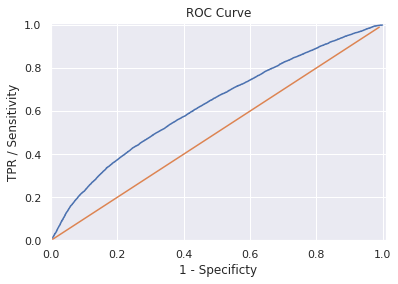

In [289]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

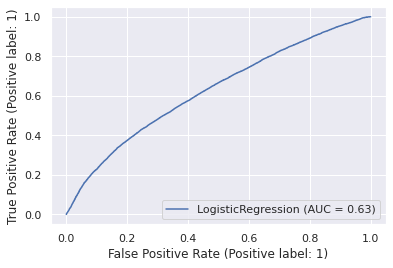

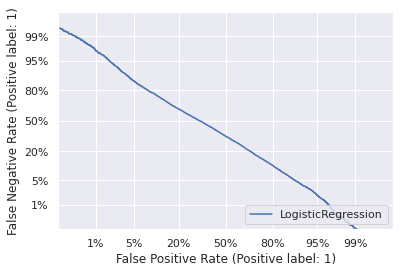

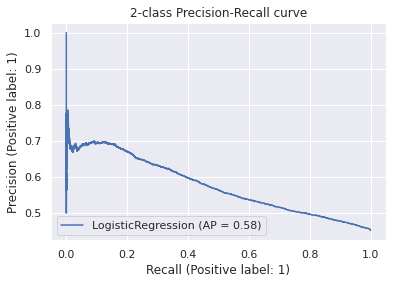

In [290]:
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
DetCurveDisplay.from_estimator(logistic_regression, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [291]:
# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_sd, y_train)

# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
# rfc_disp.figure_.suptitle("ROC curve comparison")

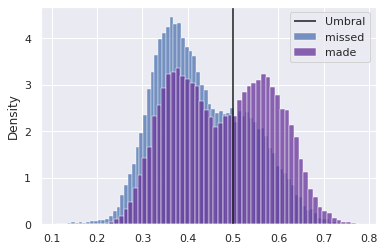

In [292]:
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = logistic_regression.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

Bajo este criterio donde tenemos unos features balanceados.

In [293]:
y_pred_04 = binarize(y_test_pred_proba, threshold=0.4)[:,1]
y_pred_04 = (y_test_pred_proba[:,1] > 0.4).astype(int)
y_pred_04

array([1, 0, 1, ..., 0, 0, 1])

In [294]:
print('Matrix Original')
print(confusion_matrix(y_test,y_test_pred))
print('Nueva Matrix')
print(confusion_matrix(y_test,y_pred_04)) 
print('Acc umbral 0.5 =', accuracy_score(y_test, y_test_pred))
print('Acc umbral 0.4 =', accuracy_score(y_test, y_pred_04))
print('Recall umbral 0.5=', recall_score(y_test, y_test_pred))
print('Recall umbral 0.4=', recall_score(y_test, y_pred_04))

Matrix Original
[[12524  4551]
 [ 7768  6312]]
Nueva Matrix
[[7785 9290]
 [4197 9883]]
Acc umbral 0.5 = 0.6045899534585139
Acc umbral 0.4 = 0.5670999839512116
Recall umbral 0.5= 0.44829545454545455
Recall umbral 0.4= 0.7019176136363636


####Con Regularizacion

0.6045578558818809
[[ 0.10816592  0.14700195 -0.39606855  0.08000552  0.09976824]]


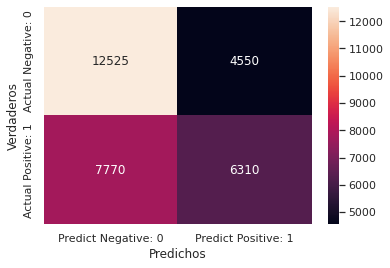

In [295]:
logistic_regression_Lasso = LogisticRegression(penalty='l1', solver= 'liblinear')
logistic_regression_Lasso.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Lasso.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Lasso.coef_)
confusion1 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion1, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

0.6045578558818809
[[ 0.10820387  0.1470272  -0.39620562  0.08017227  0.0998125 ]]


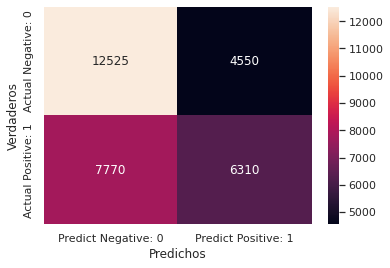

In [296]:
logistic_regression_Ridge = LogisticRegression(penalty='l2', solver= 'liblinear')
logistic_regression_Ridge.fit(X_train_sd, y_train);
y_test_pred = logistic_regression_Ridge.predict(X_test_sd)
y_test_pred
print(accuracy_score(y_test, y_test_pred))
print(logistic_regression_Ridge.coef_)
confusion_matrix(y_test, y_test_pred)
confusion2 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion2, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

####Considerando Cross Validation 

0.6044615631519821
[[ 0.10810476  0.14704264 -0.39517877  0.07932638  0.09980044]]


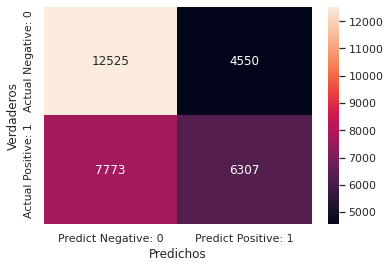

In [297]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train_sd, y_train)
y_test_pred = clf.predict(X_test_sd)
y_test_pred
accuracy2 = accuracy_score(y_test, y_test_pred)
y_test_pred_proba = clf.predict_proba(X_test_sd)
print(accuracy2)
print(clf.coef_)
confusion_matrix(y_test, y_test_pred)
confusion3 = confusion_matrix(y_test, y_test_pred)
conf_mat_df = pd.DataFrame(data=confusion3, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])
sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(conf_mat_df, annot=True, fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [298]:
confusioncv = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', confusion)

print('\nTrue Positives(TP) = ', confusioncv[1,1])

print('\nTrue Negatives(TN) = ', confusioncv[0,0])

print('\nFalse Positives(FP) = ', confusioncv[0,1])

print('\nFalse Negatives(FN) = ', confusioncv[1,0])

Confusion matrix

 [[12524  4551]
 [ 7768  6312]]

True Positives(TP) =  6307

True Negatives(TN) =  12525

False Positives(FP) =  4550

False Negatives(FN) =  7773


In [299]:
TP2 = confusioncv[1, 1]; TN2 = confusioncv[0, 0] ; FP2 = confusioncv[0, 1] ; FN2 = confusioncv[1, 0]
print('TP: ', TP2,' TN: ', TN2,' FP: ',FP2,' FN: ',FN2 )
Specificity2 = (TN2)/(TP2+FN2) 
Sensitivity2 = (TP2)/(TP2+FN2)

TP:  6307  TN:  12525  FP:  4550  FN:  7773


In [300]:
Recall2 = recall_score(y_test, y_test_pred,average= None)
Precision_Score2 = precision_score(y_test, y_test_pred, average= None)
F1_Score2 = f1_score(y_test, y_test_pred, average= None)
print('Recall Score:',Recall2)
print('Precision Score:', Precision_Score2)
print('F1 Score:',F1_Score2)

Recall Score: [0.73352855 0.44794034]
Precision Score: [0.61705587 0.58091554]
F1 Score: [0.67026998 0.5058347 ]


AUC= 0.6269067512145614


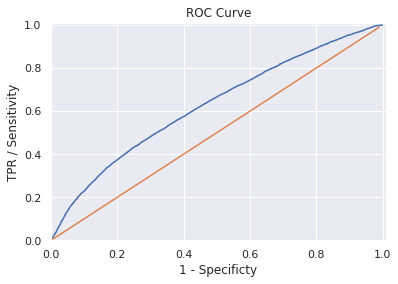

In [301]:
fpr_log_cv,tpr_log_cv,thr_log_cv = roc_curve(y_test, y_test_pred_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

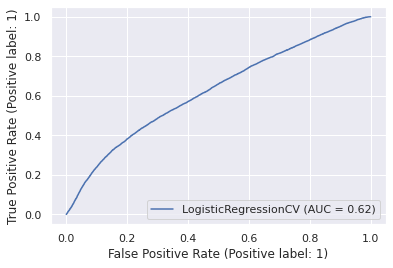

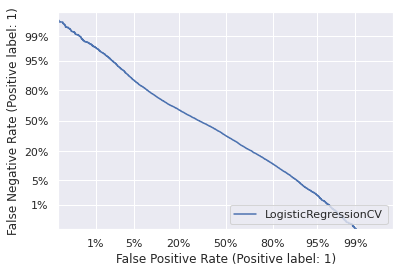

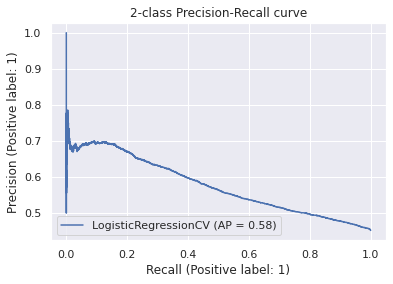

In [302]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
DetCurveDisplay.from_estimator(clf, X_test, y_test)
display = PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba[:,1], name="LogisticRegressionCV")
_ = display.ax_.set_title("2-class Precision-Recall curve")

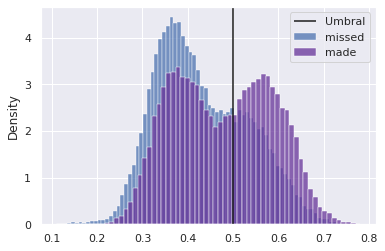

In [303]:
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==0])[:,1], stat = 'density')
sns.histplot(data = clf.predict_proba(X_train_sd[y_train==1])[:,1], stat = 'density', color = 'rebeccapurple')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'missed', 'made'])

El modelo mejora considerablemente con CV y estandarizando los features.

#####Grid Search

In [304]:
models = [LogisticRegression()]
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2'],
     'solver': ['liblinear','saga','sag']}]
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train_sd, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag']},
             scoring='accuracy')


In [305]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.6033766955211932
LogisticRegression(C=100, penalty='l1', solver='liblinear')
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [306]:
Scores_Hiperparamentros = pd.DataFrame(grids[0].cv_results_)
y_preds_log = grids[0].predict(X_test_sd)
print (classification_report(y_test, y_preds_log))
confusion_matrix(y_test, y_preds_log)
Scores_Hiperparamentros.head(2)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     17075
           1       0.58      0.45      0.51     14080

    accuracy                           0.60     31155
   macro avg       0.60      0.59      0.59     31155
weighted avg       0.60      0.60      0.60     31155



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.30,0.03,0.01,0.00,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.60,0.60,...,0.60,0.60,0.60,0.60,0.60,0.60,0.61,0.60,0.00,17
1,1.57,0.12,0.00,0.00,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.60,0.60,...,0.60,0.60,0.60,0.60,0.60,0.60,0.61,0.60,0.00,12


###Naive Bayes

In [307]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train_sd, y_train).predict(X_test_sd)

In [308]:
y_test_pred = gnb.predict(X_test_sd)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [309]:
print("accuracy_score_ ", (accuracy_score(y_test, y_test_pred)))
print(y_test.value_counts())

accuracy_score_  0.5903707270101107
0    17075
1    14080
Name: FGM, dtype: int64


In [310]:
confu = confusion_matrix(y_test, y_test_pred)
print(confu)

[[10507  6568]
 [ 6194  7886]]


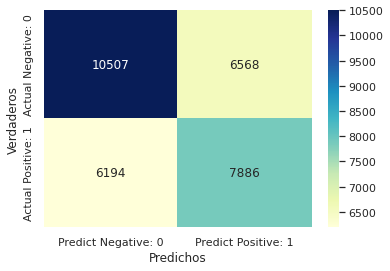

In [311]:
conf_mat_df = pd.DataFrame(data=confu, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [312]:
y_pred_bayes_proba = gnb.predict_proba(X_test_sd)

AUC= 0.6269067512145614


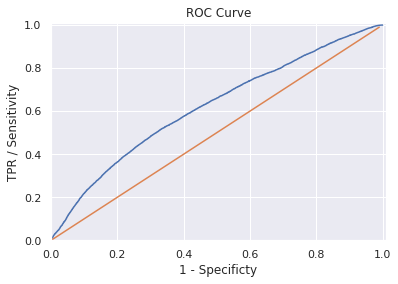

In [313]:
fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])
dfg = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
print('AUC=', auc(fpr_log, tpr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(dfg['fpr'],dfg['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [314]:
confusionbestnb = confusion_matrix(y_test, y_pred_nb)
print(confusionbestnb)

[[10507  6568]
 [ 6194  7886]]


In [315]:
Recall3 = recall_score(y_test, y_pred_nb,average= None)
Precision_Score3 = precision_score(y_test, y_pred_nb, average= None)
F1_Score3 = f1_score(y_test, y_pred_nb, average= None)
print('Recall Score:',Recall3)
print('Precision Score:', Precision_Score3)
print('F1 Score:',F1_Score3)

Recall Score: [0.61534407 0.56008523]
Precision Score: [0.629124   0.54559292]
F1 Score: [0.62215775 0.55274409]


In [316]:
accuracy3 = accuracy_score(y_test, y_pred_nb)

In [317]:
TP3 = confusionbestnb[1, 1]; TN3 = confusionbestnb[0, 0] ; FP3 = confusionbestnb[0, 1] ; FN3 = confusionbestnb[1, 0]
print('TP: ', TP3,' TN: ', TN3,' FP: ',FP3,' FN: ',FN3 )
Specificity3 = (TN3)/(TP3+FN3) 
Sensitivity3 = (TP3)/(TP3+FN3)

TP:  7886  TN:  10507  FP:  6568  FN:  6194


###KNN

In [318]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [319]:
confusionkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10787  6288]
 [ 7383  6697]]


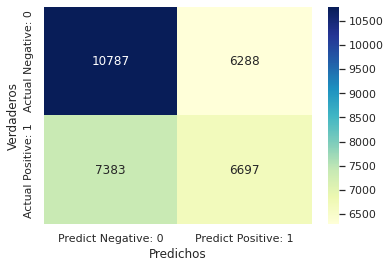

In [320]:
conf_mat_df = pd.DataFrame(data=confusionkn, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [321]:
TP4 = confusionkn[1, 1]; TN4 = confusionkn[0, 0] ; FP4 = confusionkn[0, 1] ; FN4 = confusionkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  6697  TN:  10787  FP:  6288  FN:  7383


In [322]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn))

Accuracy= 0.5611940298507463


In [323]:
print('Accuracy=', (TP4+TN4)/ (TP4+TN4+FP4+FN4))
print('Total de casos correctamente predichos (TP+TN) =',(TP4+TN4))
print('Total de casos (TP+TN+FP+FN) =',(TP4+TN4+FP4+FN4))

Accuracy= 0.5611940298507463
Total de casos correctamente predichos (TP+TN) = 17484
Total de casos (TP+TN+FP+FN) = 31155


In [324]:
print(recall_score(y_test, y_pred_knn,average=None))

[0.63174231 0.4756392 ]


In [325]:
fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_test_pred_proba_knn[:,1])

KNN Grid Search

In [326]:
# knn_gs = KNeighborsClassifier()
# knn_gs.get_params()

In [327]:
# k_range_knn_gs = list(range(2, 10))
# param_grid = dict(n_neighbors=k_range_knn_gs)
# print(param_grid)

In [328]:
# folds=StratifiedKFold(n_splits=2, random_state=9, shuffle=True)

In [329]:
# grid_knn = GridSearchCV(knn_gs, param_grid, cv=folds, scoring='accuracy')

In [330]:
# grid_knn.fit(X_train_sd, y_train)

In [331]:
# print(grid_knn.best_estimator_)
# print(grid_knn.best_score_)
# print(grid_knn.best_params_)

In [332]:
# y_pred_grid = grid_knn.predict(X_test_sd)

In [333]:
# confusion_grid_knn = confusion_matrix(y_test, y_pred_grid)
# print(confusion)

In [334]:
# print (classification_report(y_test, y_pred_grid))

KNN Random Search

In [335]:
# knn_rs = KNeighborsClassifier()

In [336]:
# k_range = list(range(1, 10))
# param_grid = dict(n_neighbors=k_range)
# print(param_grid)

In [337]:
# random_knn = RandomizedSearchCV(knn_rs, param_grid, n_iter=9, cv=folds, scoring='accuracy',random_state=9)
# random_knn.fit(X_train_sd, y_train)

In [338]:
# print (random_knn.best_estimator_)
# print(random_knn.best_score_)
# print(random_knn.best_params_)

In [339]:
# confusion_random_knn = confusion_matrix(y_test, random.predict(X_test_sd))
# print(confusion)

In [340]:
# print (classification_report(y_test, random_knn.predict(X_test_sd)))

Best KNN = 8, grid y random search devuelven el mismo valor, dejamos las celdas comentadas por el tiempo que tardan en ejecutarse.


In [341]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_sd, y_train);
y_pred_knn = knn.predict(X_test_sd)
y_test_pred_proba_knn = knn.predict_proba(X_test_sd)

In [342]:
confusionbestkn = confusion_matrix(y_test, y_pred_knn)
print(confusionkn)

[[10787  6288]
 [ 7383  6697]]


In [343]:
Recall4 = recall_score(y_test, y_pred_knn,average= None)
Precision_Score4 = precision_score(y_test, y_pred_knn, average= None)
F1_Score4 = f1_score(y_test, y_pred_knn, average= None)
print('Recall Score:',Recall4)
print('Precision Score:', Precision_Score4)
print('F1 Score:',F1_Score4)

Recall Score: [0.75830161 0.3671875 ]
Precision Score: [0.59236893 0.55609336]
F1 Score: [0.66514268 0.4423151 ]


In [344]:
accuracy4 = accuracy_score(y_test, y_pred_knn)

In [345]:
TP4 = confusionbestkn[1, 1]; TN4 = confusionbestkn[0, 0] ; FP4 = confusionbestkn[0, 1] ; FN4 = confusionbestkn[1, 0]
print('TP: ', TP4,' TN: ', TN4,' FP: ',FP4,' FN: ',FN4 )
Specificity4 = (TN4)/(TP4+FN4) 
Sensitivity4 = (TP4)/(TP4+FN4)

TP:  5170  TN:  12948  FP:  4127  FN:  8910


## Conclusiones con X2

Luego de evaluar distintos modelos, presentamos sus scores en una recopilacion de modelos considerando asi tambien las distintas opciones de seleccion por features. Como:
Si el partido fue ganado por el tira

*   Si el partido fue ganado por el tira
*   Tiempo en el reloj
*   Distancia de tiro 
*   Tipo de Punto
*   Performance del jugador ofensivo. 

Son caracteristicas principales del rendimiento del Jugador que lanza el balon al aro. 

Vemos que la curva ROC de Naive Bayes mejora considerablemente e incrementa asi el area bajo la curva de pruebas anteriores.

In [346]:
elementos={'Accuracy':[accuracy1,accuracy2,accuracy3,accuracy4],'TP':[TP1,TP2,TP3,TP4],'TN': [TN1,TN2,TN3,TN4], 'FP': [FP1,FP2,FP3,FP4],  'FN': [FN1,FN2,FN3,FN4], 'Sensitivity': [Sensitivity1,Sensitivity2,Sensitivity3,Sensitivity4], 'Specificity': [Specificity1,Specificity2,Specificity3,Specificity4], 'recall_score': [Recall1[1],Recall2[1],Recall3[1],Recall4[1]], 'precision_score': [Precision_Score1[1] ,Precision_Score2[1],Precision_Score3[1],Precision_Score4[1]], 'F1_Score': [F1_Score1[1],F1_Score2[1],F1_Score3[1],F1_Score4[1]]}
Comparacion_Modelos_x2 = pd.DataFrame(elementos,index=['Regresion Logistica ', 'Regresion Logistica CV ', 'Naive Bayes ', 'KNN ']) 

In [347]:
Comparacion_Modelos_x2.head()

,Accuracy,TP,TN,FP,FN,Sensitivity,Specificity,recall_score,precision_score,F1_Score
Regresion Logistica,0.60,6312,12524,4551,7768,0.45,0.89,0.45,0.58,0.51
Regresion Logistica CV,0.60,6307,12525,4550,7773,0.45,0.89,0.45,0.58,0.51
Naive Bayes,0.59,7886,10507,6568,6194,0.56,0.75,0.56,0.55,0.55
KNN,0.58,5170,12948,4127,8910,0.37,0.92,0.37,0.56,0.44


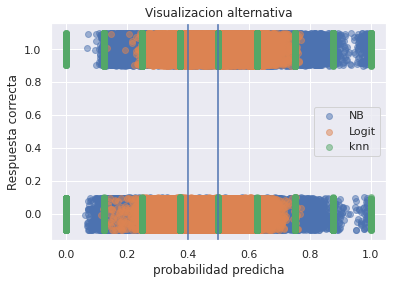

In [348]:
y_pred_bayes_proba # NaiveBayes probability
y_test_pred_proba # LogisticCV probability
y_test_pred_proba_knn # KNN probability
y_test
y_test_modificado = y_test + [random.random()/5-0.1 for _ in range(len(y_test))]
umbral1 = 0.5
umbral2 = 0.4

fig, ax = plt.subplots()
ax.scatter(y_pred_bayes_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba[:,1],y_test_modificado, alpha=0.5)
ax.scatter(y_test_pred_proba_knn[:,1],y_test_modificado, alpha=0.5)
ax.legend(['NB','Logit','knn'])
plt.xlabel('probabilidad predicha')
plt.ylabel('Respuesta correcta')
plt.title('Visualizacion alternativa')
plt.axvline(x=umbral1)
plt.axvline(x=umbral2)


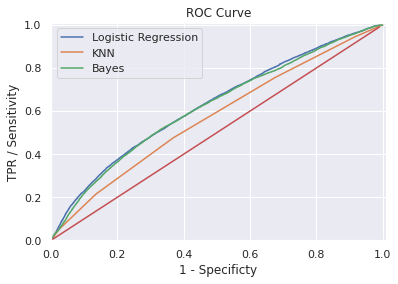

In [349]:
df_logistic = pd.DataFrame(dict(fpr=fpr_log_cv, tpr=tpr_log_cv, thr = thr_log_cv))
plt.plot(df_logistic['fpr'],df_logistic['tpr'], label='Logistic Regression')

df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_bayes = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

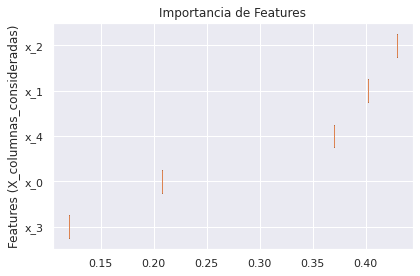

In [350]:
feature_names = np.array([f"x_{i}" for i in range(X_train_sd.shape[1])])

rf = RandomForestClassifier(random_state=0).fit(X_train_sd, y_train)
result = permutation_importance(rf, X_train_sd, y_train, n_repeats=1, random_state=0, n_jobs=2)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx]
)
ax.set_title("Importancia de Features")
ax.set_ylabel("Features (X_columnas_consideradas)")
fig.tight_layout()
plt.show()

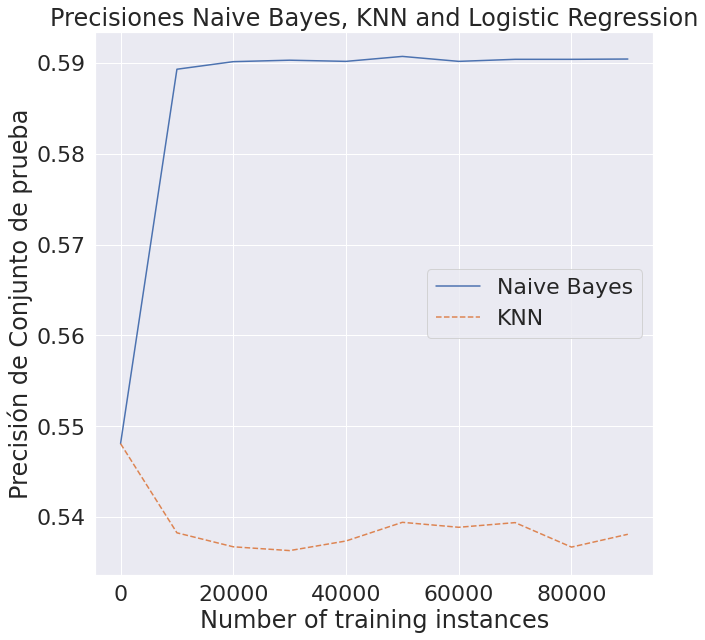

In [351]:
lr= LogisticRegression(penalty='none')
nb =GaussianNB()
knn = KNeighborsClassifier(n_neighbors=1) 

lr_scores = []
nb_scores = []
knn_scores = []

train_sizes = range(1,len(X_train_sd),10000)  #

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train_sd, y_train, train_size=train_size, random_state=6)
    nb.fit(X_slice, y_slice) 
    nb_scores.append(nb.score(X_test_sd, y_test))
    #lr.fit(X_slice, y_slice)
    #lr_scores.append(lr.score(X_test_sd, y_test))
    knn.fit(X_slice, y_slice)
    knn_scores.append(knn.score(X_test_sd, y_test))


sns.set(font_scale=2)
fig = plt.subplots(figsize=(10,10))
plt.plot(train_sizes, nb_scores, label='Naive Bayes')
#plt.plot(train_sizes, lr_scores, linestyle= '--', label='Logistic Regression CV')
plt.plot(train_sizes, knn_scores, label='KNN', linestyle="--")
plt.title("Precisiones Naive Bayes, KNN and Logistic Regression")
plt.xlabel("Number of training instances")
plt.ylabel("Precisión de Conjunto de prueba")
plt.legend()

# Seccion clasificacion & Performance de modelos

Esto lo realizamos con un fin de apreciar los resultados optenidos de otra forma. 

In [352]:
models = [LogisticRegressionCV, GaussianNB, KNeighborsClassifier]

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers=models)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                      Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                  
LogisticRegressionCV      0.60               0.59     0.59      0.60   
GaussianNB                0.59               0.59     0.59      0.59   
KNeighborsClassifier      0.56               0.55     0.55      0.56   

                      Time Taken  
Model                             
LogisticRegressionCV        2.55  
GaussianNB                  0.08  
KNeighborsClassifier        1.43  


# Comparacion de Conclusiones

Bajo las distintas selecciones de features podemos apreciar el desempeño de los modelos dando como mejor resultado un Accuracy de 0.61 para regresion logistica, teniendo sentido esto dado el tipo de datos que manejamos. 

Adicional a esto vemos como incrementa el rendimiento de modelos como KNN & Naive Bayes, cuando son considerados menos feautures 

In [353]:
print('Opcion_0:',Comparacion_Modelos_x) 
print('Opcion_1:',Comparacion_Modelos_x0)
print('Opcion_2:',Comparacion_Modelos_x1)
print('Opcion_3:',Comparacion_Modelos_x2)

Opcion_0:                          Accuracy    TP     TN    FP    FN  Sensitivity  \
Regresion Logistica          0.61  6440  12699  4376  7640         0.46   
Regresion Logistica CV       0.61  5596  13543  3532  8484         0.40   
Naive Bayes                  0.58  7328  10892  6183  6752         0.52   
KNN                          0.57  4936  12876  4199  9144         0.35   

                         Specificity  recall_score  precision_score  F1_Score  
Regresion Logistica             0.90          0.46             0.60      0.52  
Regresion Logistica CV          0.96          0.40             0.61      0.48  
Naive Bayes                     0.77          0.52             0.54      0.53  
KNN                             0.91          0.35             0.54      0.43  
Opcion_1:                          Accuracy    TP     TN    FP    FN  Sensitivity  \
Regresion Logistica          0.61  6734  12252  4823  7346         0.48   
Regresion Logistica CV       0.62  5772  13477  3598  